In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import datetime
from datetime import date
from datetime import timedelta
import calendar
import time
%matplotlib inline
from pathlib import Path 
import os
from matplotlib.ticker import ScalarFormatter
from matplotlib import ticker

# Setting up Directory and Filepaths

In [2]:
#Find yesterday's date and convert it to string
today=date.today()
yesterday=today-timedelta(days=1)
ydate=yesterday.strftime("%d-%m-%Y")
todate=today.strftime("%d-%m-%Y")

#Specify Data folder
data_folder = Path("../data")

#Compute filename
data_file = ydate + ".csv"

#Compute complete filepath for the day
file_path = data_folder / data_file

#Create Year Folder and Month Folder
year=str(yesterday.year)
month=calendar.month_name[yesterday.month]

#Set Chart Folder
chart_folder= Path("../charts")

#Create Year Folder
year_folder=chart_folder/year

try:
    os.mkdir(year_folder)
    print('New Directory Created for this year')
except:
    print("Directory already exists")
    
# Create Month Folder
month_folder=year_folder/month
try:
    os.mkdir(month_folder)
    print('New Directory Created for this month')
except:
    print("Directory already exists")

    
#Create Date Folder
date_folder=month_folder/ydate
try:
    os.mkdir(date_folder)
    print('New Directory Created for today')
except:
    print("Directory already exists")
    
#Set Export Path for Charts in Date Folder
export_path=date_folder/'India-States'
try:
    os.mkdir(export_path)
    print('New Directory Created for today')
except:
    print("Directory already exists")
    
#Set Export Path for India Charts
ep_india=export_path/'India'
try:
    os.mkdir(ep_india)
    print('New Directory Created for today')
except:
    print("Directory already exists")
    
#Set Export Path for State Charts
ep_state=export_path/'States'
try:
    os.mkdir(ep_state)
    print('New Directory Created for today')
except:
    print("Directory already exists")

Directory already exists
Directory already exists
Directory already exists
Directory already exists
Directory already exists
Directory already exists


# Setting up for Analysis

In [3]:
#Read file to data frame
df=pd.read_csv(file_path)

df['Date']= pd.to_datetime(df['Date'], dayfirst=True)
df=df[df['Date']!=today] #Drop today's data
df_h=df[df['Status']=='Hospitalized']
df_r=df[df['Status']=='Recovered']
df_d=df[df['Status']=='Deceased']

C:\Users\joses\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\joses\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  """


#### Create a list order of States according to cumulative cases

In [4]:
#Create a time series for States by New Cases
states=pd.DataFrame(df_h.groupby(['Date','State'])['Num_Cases'].sum())
states.rename(columns={'Num_Cases':'Daily New Cases'}, inplace=True)
state_daily=states.pivot_table(index='Date', columns='State', fill_value=0)

#Create a time series for States by Cumulative Cases 
state_cum=state_daily.cumsum()
state_cum.rename(columns={'Daily New Cases':'Cumulative Cases'}, inplace=True)

#Arrange states in descending order of latest cumulative Cases
trans=state_cum.transpose()
sort_state=pd.DataFrame(trans[yesterday].sort_values(ascending=False))
mylist=sort_state.index.tolist() #Export to a list (Array of Cumulative Cases and State names)
state_list=[row[1] for row in mylist]#Creates a new list from the array above and extracts only the state names
state_list.remove('State Unassigned')

# Analysis

In [39]:
anlist = ['Cases', 'Deceased', 'Recovered'] # List for analysis
c_ind_cum=pd.DataFrame()
c_ind_daily_7dra=pd.DataFrame()
c_state_cum_all=pd.DataFrame()
c_state_new7dra_daf=pd.DataFrame()
c_ind_cum_pct=pd.DataFrame()
c_state_cum_pct=pd.DataFrame()
c_sort_states=pd.DataFrame()

d_ind_cum=pd.DataFrame()
d_ind_daily_7dra=pd.DataFrame()
d_state_cum_all=pd.DataFrame()
d_state_new7dra_daf=pd.DataFrame()
d_ind_cum_pct=pd.DataFrame()
d_state_cum_pct=pd.DataFrame()
d_sort_states=pd.DataFrame()

r_ind_cum=pd.DataFrame()
r_ind_daily_7dra=pd.DataFrame()
r_state_cum_all=pd.DataFrame()
r_state_new7dra_daf=pd.DataFrame()
r_ind_cum_pct=pd.DataFrame()
r_state_cum_pct=pd.DataFrame()
r_sort_states=pd.DataFrame()

def Diff(li1, li2): 
    li_dif = [i for i in li1 + li2 if i not in li1 or i not in li2] 
    return li_dif

def analyse(name):
    if name=='Cases':
        a_df=df_h #Dataframe to analyse
        gname='Cases' #General Name
    elif name=='Deceased':
        a_df=df_d #Dataframe to analyse
        gname='Deaths' #General Name
    elif name=='Recovered':
        a_df=df_r #Dataframe to analyse
        gname='Recoveries' #General Name
    else:
        print('Illegal Value')
        
    global c_ind_cum
    global c_ind_daily_7dra
    global c_state_cum_all
    global c_state_new7dra_daf
    global c_ind_cum_pct
    global c_state_cum_pct
    global c_sort_states

    global d_ind_cum
    global d_ind_daily_7dra
    global d_state_cum_all
    global d_state_new7dra_daf
    global d_ind_cum_pct
    global d_state_cum_pct
    global d_sort_states

    global r_ind_cum
    global r_ind_daily_7dra
    global r_state_cum_all
    global r_state_new7dra_daf
    global r_ind_cum_pct
    global r_state_cum_pct
    global r_sort_states
    
    ####################
    #Analysis for INDIA#
    ####################
    
    #Daily New count in India
    ind_daily=pd.DataFrame(a_df.groupby('Date')['Num_Cases'].sum())
    tname= "Daily New "+gname # Title name
    ind_daily.rename(columns={'Num_Cases':tname}, inplace=True)
    
    #Cumulative count in India
    ind_cum=ind_daily.cumsum()
    tname1='Daily New '+gname #Title name1
    tname2= "Cumulative "+gname # Title name2
    ind_cum.rename(columns={tname1:tname2},inplace=True)
    
    #Calculate the 7 day Rolling Average for Daily New Cases in india
    ind_daily_7dra=pd.DataFrame()
    ind_daily_7dra[ind_daily.columns[0]]=ind_daily.iloc[:,0].rolling(window=7).mean()
    tname1= "Daily New "+gname #Title name1
    tname2= "Daily New "+gname+" (7DRA)" # Title name2
    ind_daily_7dra.rename(columns={tname1:tname2}, inplace=True)
    
    #####################
    #ANALYSIS FOR STATES#
    #####################
    
    #Create a time series for States by New Cases
    states=pd.DataFrame(a_df.groupby(['Date','State'])['Num_Cases'].sum())
    tname='Daily New '+gname #Title name
    states.rename(columns={'Num_Cases':tname}, inplace=True)
    states_daily=states.pivot_table(index='Date', columns='State', fill_value=0)
    
    test_tran=states_daily.transpose()
    test=test_tran.index.tolist()
    test_list=[row[1] for row in test]
    tlist=Diff(state_list, test_list)

    if len(tlist)>0:
        for i in range(len(tlist)):
            states_daily[tname,tlist[i]]=0
    
    #Create a time series for States by Cumulative Cases 
    states_cum=states_daily.cumsum()
    tname1='Daily New '+gname #Title name1
    tname2= "Cumulative "+gname # Title name2
    states_cum.rename(columns={tname1:tname2}, inplace=True)
    
    #Select All States by Cumulative Cases
    state_cum_all=pd.DataFrame()
    tname="Cumulative "+gname # Title name
    for i in range(len(state_list)):
        state_cum_all[state_list[i]]=states_cum[tname, state_list[i]]
    
    #Obtain latest Cumulative for States for horizontal bars.
    state_cum_all.rename(columns={'Dadra and Nagar Haveli and Daman and Diu': 'DNH Daman & Diu'}, inplace=True)
    trans2=state_cum_all.transpose()
    sort_state2=pd.DataFrame(trans2[yesterday].sort_values(ascending=True))
    tname="Cumulative "+gname # Title name
    sort_state2[tname]=sort_state2
    sort_states=pd.DataFrame(sort_state2[tname])
    
    #Select All States by Daily New 
    state_new_all=pd.DataFrame()
    tname='Daily New '+gname #Title Name
    for i in range(len(state_list)):
        state_new_all[state_list[i]]=states_daily[tname, state_list[i]]
    g=len(state_new_all.columns)
    
    #Calculate 7-Day Rolling Average for All States
    state_new7dra=pd.DataFrame()
    for i in range(g):
        cname=state_new_all.columns[i] #column name
        state_new7dra[cname]= state_new_all.iloc[:,i].rolling(window=7).mean()
        
    #Extract Data after 1st detected
    state_new7dra_daf=pd.DataFrame()
    for j in range(g):
        for i in range(200):
            if state_new7dra.iloc[i,j] > 0.1:
                x=state_new7dra[state_new7dra.columns[j]].iloc[i:]
                x.reset_index(drop=True, inplace=True)
                state_new7dra_daf=pd.concat([state_new7dra_daf,x],axis=1)
                break
            elif state_new7dra.iloc[i,j] > -0.1:
                x=state_new7dra[state_new7dra.columns[j]].iloc[i:]
                x.reset_index(drop=True, inplace=True)
                state_new7dra_daf=pd.concat([state_new7dra_daf,x],axis=1)
                break
    
    ###############################
    #Percentage Change Calculation#
    ###############################
    
    #Calculating daily growth rate (cumulative cases)
    ind_cum_pct=ind_cum.pct_change()*100
    tname1='Cumulative '+gname #Title name 1
    tname2='Daily Growth Rate - '+gname
    ind_cum_pct.rename(columns={tname1:tname2}, inplace=True)
    ind_cum_pct=ind_cum_pct.rolling(window=7).mean()
    
    #Calculating daily growth rate for States (Cumulative Cases)
    state_cum_pct=state_cum_all.pct_change()*100
    state_cum_pct=state_cum_pct.rolling(window=7).mean()
    state_cum_pct=state_cum_pct.fillna(0)
    
    ###################
    #EXPORT DATAFRAMES#
    ###################
    if name=='Cases':
        c_ind_cum=ind_cum
        c_ind_daily_7dra=ind_daily_7dra
        c_ind_cum_pct=ind_cum_pct
        c_state_cum_all=state_cum_all
        c_state_new7dra_daf=state_new7dra_daf
        c_state_cum_pct=state_cum_pct
        c_sort_states=sort_states
    elif name=='Deceased':
        d_ind_cum=ind_cum
        d_ind_daily_7dra=ind_daily_7dra
        d_ind_cum_pct=ind_cum_pct
        d_state_cum_all=state_cum_all
        d_state_new7dra_daf=state_new7dra_daf
        d_state_cum_pct=state_cum_pct
        d_sort_states=sort_states
    else:
        r_ind_cum=ind_cum
        r_ind_daily_7dra=ind_daily_7dra
        r_ind_cum_pct=ind_cum_pct
        r_state_cum_all=state_cum_all
        r_state_new7dra_daf=state_new7dra_daf
        r_state_cum_pct=state_cum_pct
        r_sort_states=sort_states

In [40]:
#Do the analysis
for list in anlist:
    analyse(list)
    

# Preparations for Charting

In [163]:
#Graph Starting date is 23rd April; Calculate number of days as integer
y=(today-date(2020,4,1)).days
source="Source: www.covid19india.org"
ytitle1="Number of Cases / Deaths / Recoveries ------------->"
ytitle2="7-day Rolling Average"
daf = "Days after First Detected Case / Death / Recovery ------------------>"
credit="Created by: Dr. Joseph S, MD"
update="Data updated till " + todate + " 08:00 AM"
day1=today-timedelta(days=30)
day1=day1.strftime("%d-%m-%Y")
sdra="*7DRA = 7-Day Rolling Average."
line1="Note: Daily Charts show 7-day Rolling Averages (7DRA)."
line2="Growth Rate Charts show trends for last 30 days and is also 7DRA."
line3="Cumulative charts track trends from April 1, 2020."
line4="Note: X-axis shows Cumulative Numbers in Logarithmic Scale"
pct="Percentage ---->"
lw=2.5

yticks=[1, 5,10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]

#Convert exponents to numbers
from matplotlib.pyplot import *
def log_10_product(x, pos):
    """The two args are the value and tick position.
    Label ticks with the product of the exponentiation"""
    return '%1i' % (x)

formatter = FuncFormatter(log_10_product)

def footer1():
    fig.text(0.5, 0.92, figtit, ha='center', va='center', fontsize=20)
    plt.figtext(0.9, 0.05, credit, ha='right', va='center')
    plt.figtext(0.9, 0.035, source, ha='right', va='center')
    plt.figtext(0.9, 0.02, update, ha='right', va='center')
    plt.figtext(0.15, 0.05, line1, ha='left', va='center')
    plt.figtext(0.177, 0.035, line2, ha='left', va='center')
    plt.figtext(0.177, 0.02, line3, ha='left', va='center')
    fig.text(0.06, 0.66, ytitle1, ha='center', va='center', rotation='vertical', fontsize=14)
    fig.text(0.06, 0.2, pct, ha='center', va='center', rotation='vertical', fontsize=14)
    
def footer2():
    plt.figtext(0.9, 0.08, credit, fontsize=20, ha='right', va='center')
    plt.figtext(0.9, 0.065, source, fontsize=20, ha='right', va='center')
    plt.figtext(0.9, 0.05, update, fontsize=20, ha='right', va='center')
    plt.figtext(0.5, 0.065, line4, fontsize=40, ha='center', va='center')
#     plt.figtext(0.177, 0.035, line2, ha='left', va='center')
#     plt.figtext(0.177, 0.02, line3, ha='left', va='center')
#     fig.text(0.06, 0.66, ytitle1, ha='center', va='center', rotation='vertical', fontsize=14)
#     fig.text(0.06, 0.2, pct, ha='center', va='center', rotation='vertical', fontsize=14)
#     #fig.text(0.5, 0.36, daf, ha='center', va='center', fontsize=14)

t1='Cumulative Cases - Logarithmic'
t2='Cumulative Deaths - Logarithmic'
t3='Cumulative Recoveries - Logarithmic'
t4='Daily New Cases - Logarithmic'
t5='Daily New Deaths - Logarithmic'
t6='Daily New Recoveries - Logarithmic'
t7='Daily Growth Rate - Cases'
t8='Daily Growth Rate - Deaths'
t9='Daily Growth Rate - Recoveries'
   
# ep_india
# ep_state

# Plots Start From Here

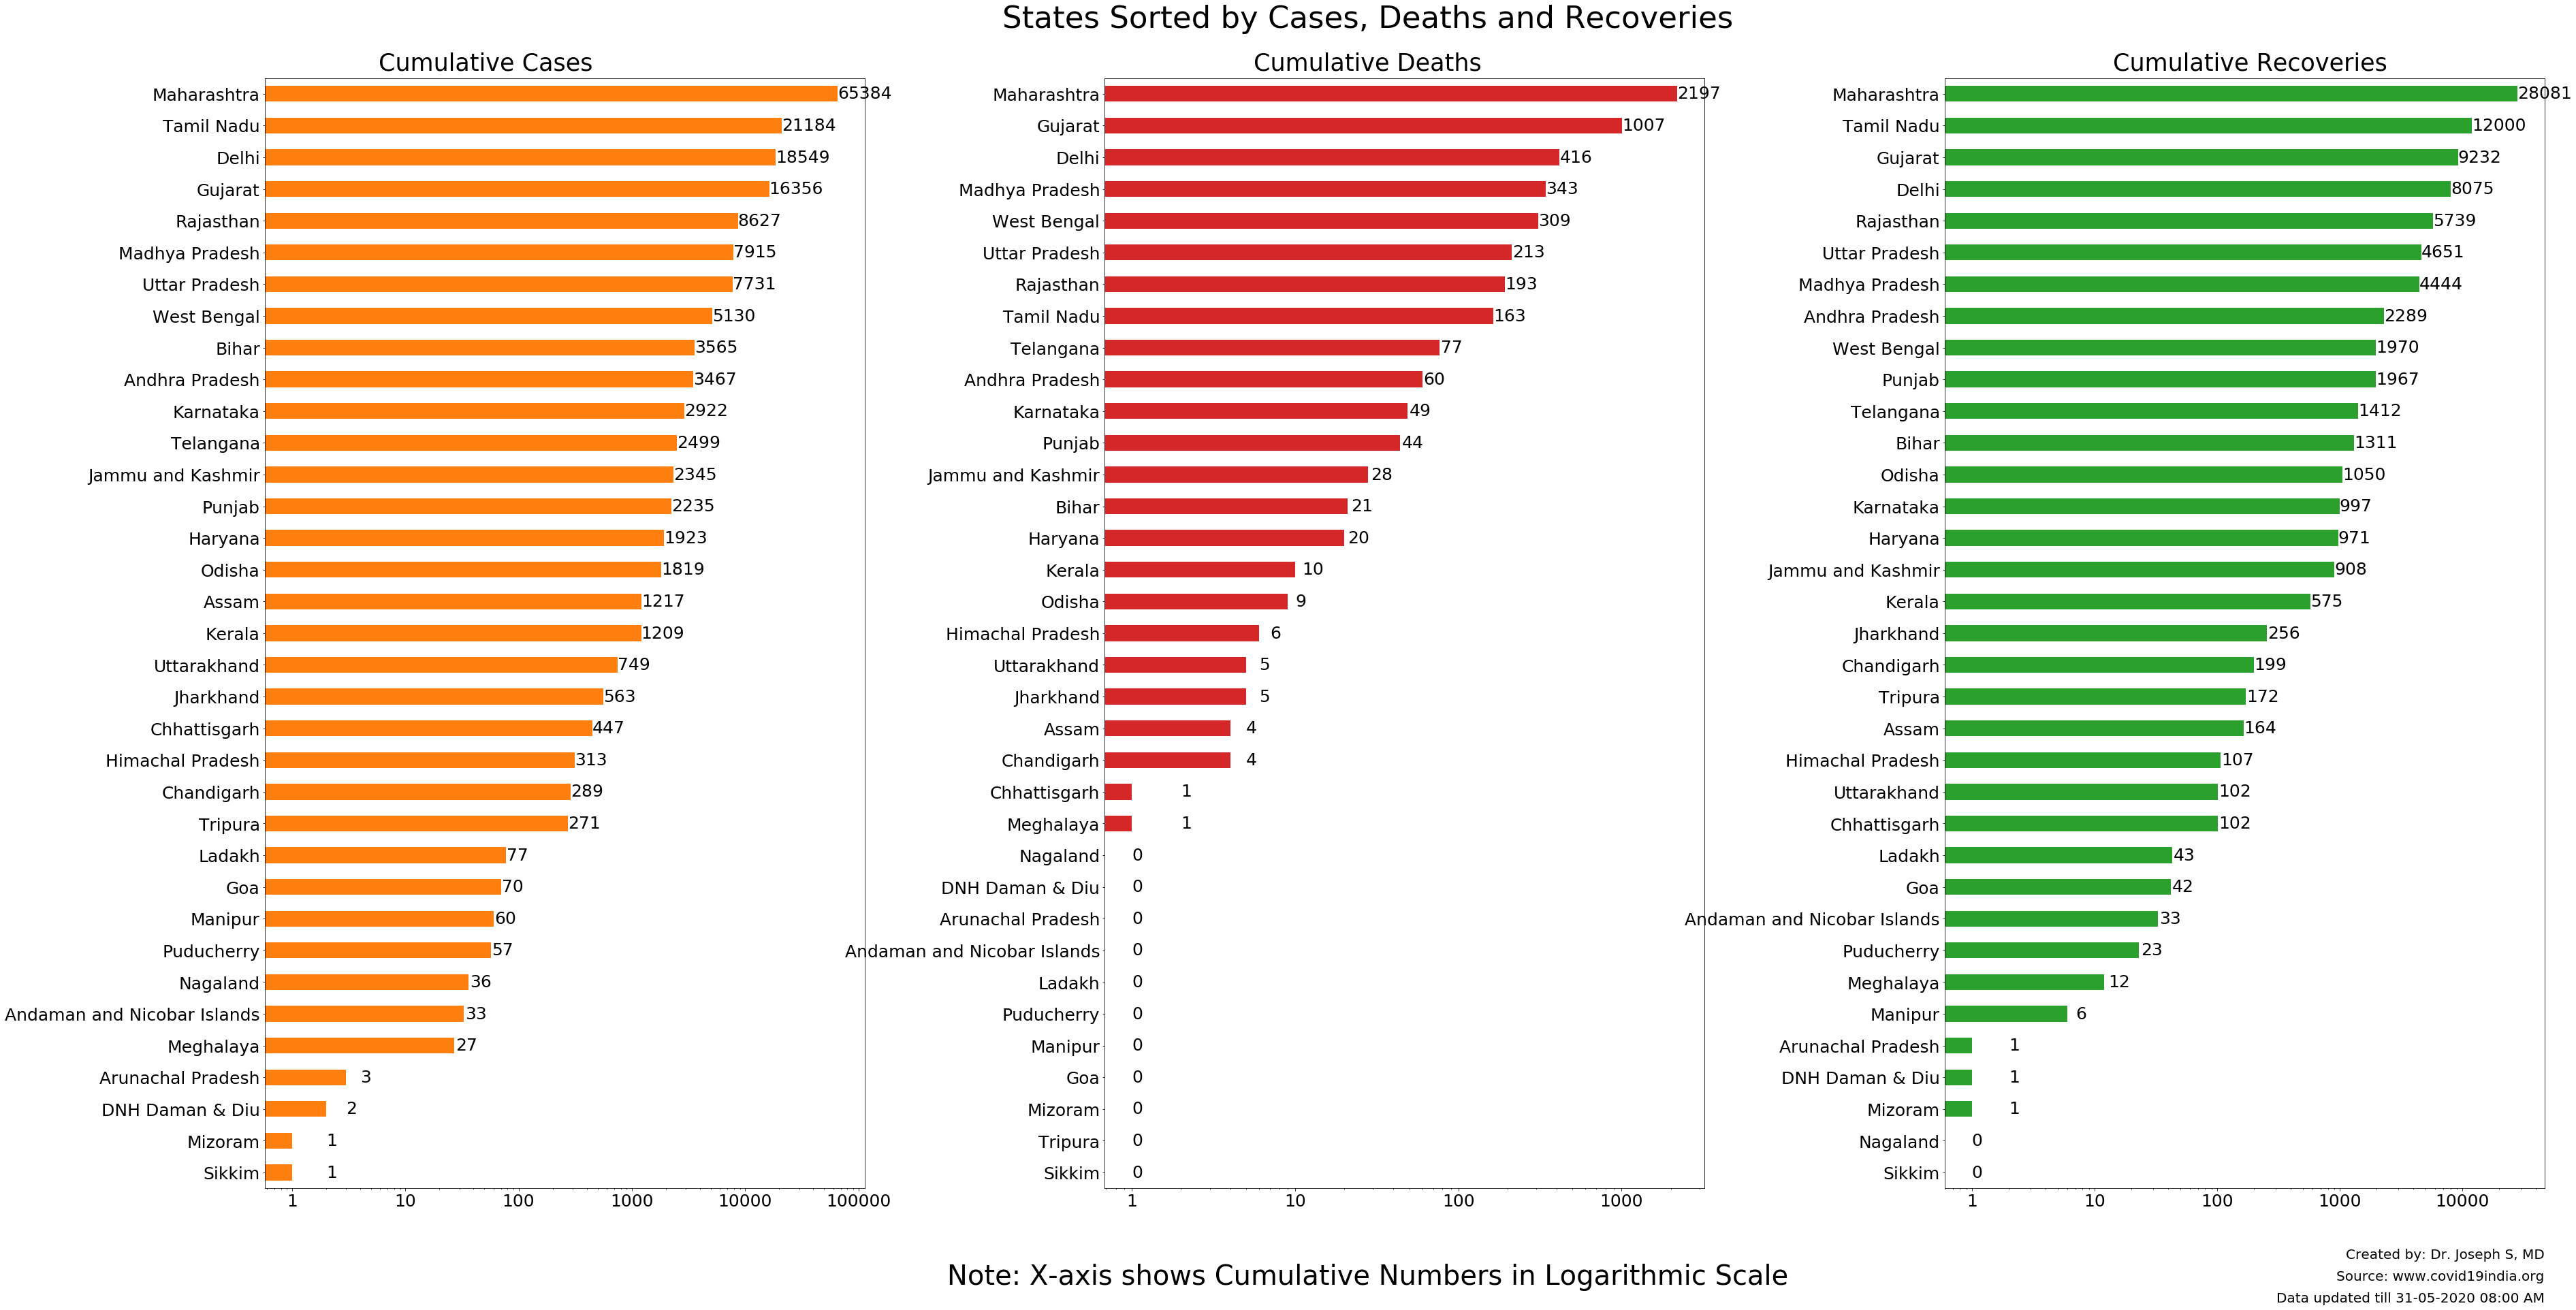

In [165]:
# Create Sorted List for States
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,30))
plt.subplots_adjust(wspace=0.4)
figtit='States Sorted by Cases, Deaths and Recoveries'
f=25
c_sort_states.plot.barh(ax=axes[0], legend=None, color='C1', fontsize=f).set_xscale('log')
d_sort_states.plot.barh(ax=axes[1], legend=None, color='C3', fontsize=f).set_xscale('log')
r_sort_states.plot.barh(ax=axes[2], legend=None, color='C2', fontsize=f).set_xscale('log')

fig.text(0.5, 0.92, figtit, fontsize=45, ha='center', va='center')
fig.text(0.2, 0.89, 'Cumulative Cases', fontsize=35, ha='center', va='center')
fig.text(0.5, 0.89, 'Cumulative Deaths', fontsize=35, ha='center', va='center')
fig.text(0.8, 0.89, 'Cumulative Recoveries', fontsize=35, ha='center', va='center')

for i in range(3):
    axes[i].xaxis.set_major_formatter(formatter)

for p in range(len(c_sort_states.index)):
    v=int(c_sort_states.iloc[p])
    axes[0].text(v+1, p, str(v), ha='left', va='center', fontsize=f)
    
for q in range(len(d_sort_states.index)):
    v=int(d_sort_states.iloc[q])
    axes[1].text(v+1, q, str(v), ha='left', va='center', fontsize=f)
    
for r in range(len(r_sort_states.index)):
    v=int(r_sort_states.iloc[r])
    axes[2].text(v+1, r, str(v), ha='left', va='center', fontsize=f)

footer2()
figtit=figtit+".jpg"
figpath=ep_india/figtit
plt.savefig(figpath, dpi=300, bbox_inches='tight')
fig.show()

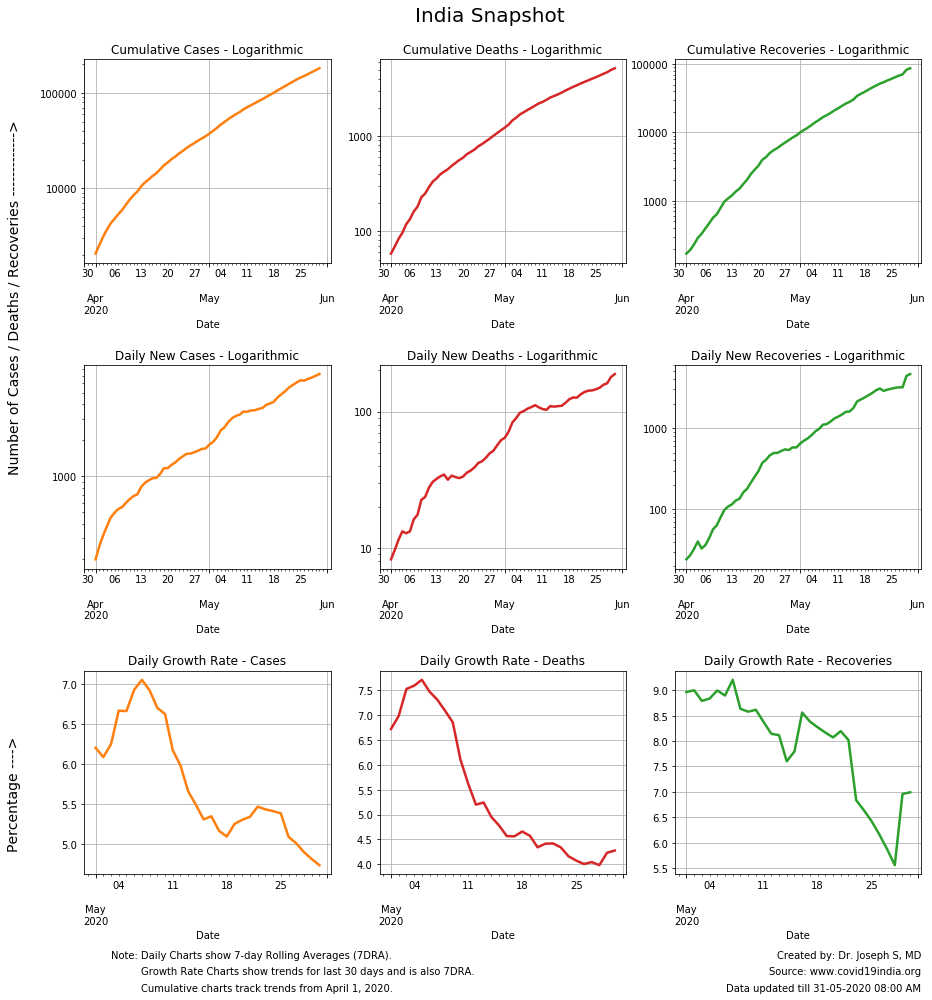

In [26]:
# Create India Snapshot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
plt.subplots_adjust(hspace=0.5)
figtit="India Snapshot"

c_ind_cum.tail(y).plot(kind='line', ax=axes[0,0], color='C1', grid=True, legend=None, linewidth=lw, title=t1).set_yscale('log')
d_ind_cum.tail(y).plot(kind='line', ax=axes[0,1], color='C3', grid=True, legend=None, linewidth=lw, title=t2).set_yscale('log')
r_ind_cum.tail(y).plot(kind='line', ax=axes[0,2], color='C2', grid=True, legend=None, linewidth=lw, title=t3).set_yscale('log')
c_ind_daily_7dra.tail(y).plot(kind='line', ax=axes[1,0], color='C1', grid=True, legend=None, linewidth=lw, title=t4).set_yscale('log')
d_ind_daily_7dra.tail(y).plot(kind='line', ax=axes[1,1], color='C3', grid=True, legend=None, linewidth=lw, title=t5).set_yscale('log')
r_ind_daily_7dra.tail(y).plot(kind='line', ax=axes[1,2], color='C2', grid=True, legend=None, linewidth=lw, title=t6).set_yscale('log')
c_ind_cum_pct.tail(30).plot(kind='line', ax=axes[2,0], color='C1', grid=True, legend=None, linewidth=lw, title=t7).set_yscale('linear')
d_ind_cum_pct.tail(30).plot(kind='line', ax=axes[2,1], color='C3', grid=True, legend=None, linewidth=lw, title=t8).set_yscale('linear')
r_ind_cum_pct.tail(30).plot(kind='line', ax=axes[2,2], color='C2', grid=True, legend=None, linewidth=lw, title=t9).set_yscale('linear')

for i in range(2):
    for j in range(3):
        axes[i,j].yaxis.set_major_formatter(formatter)
        
footer1()
figtit=figtit+".jpg"
figpath=ep_india/figtit
plt.savefig(figpath, dpi=300, bbox_inches='tight')
fig.show()

C:\Users\joses\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\joses\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)
C:\Users\joses\Anaconda3\lib\site-packages\matplotlib\ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


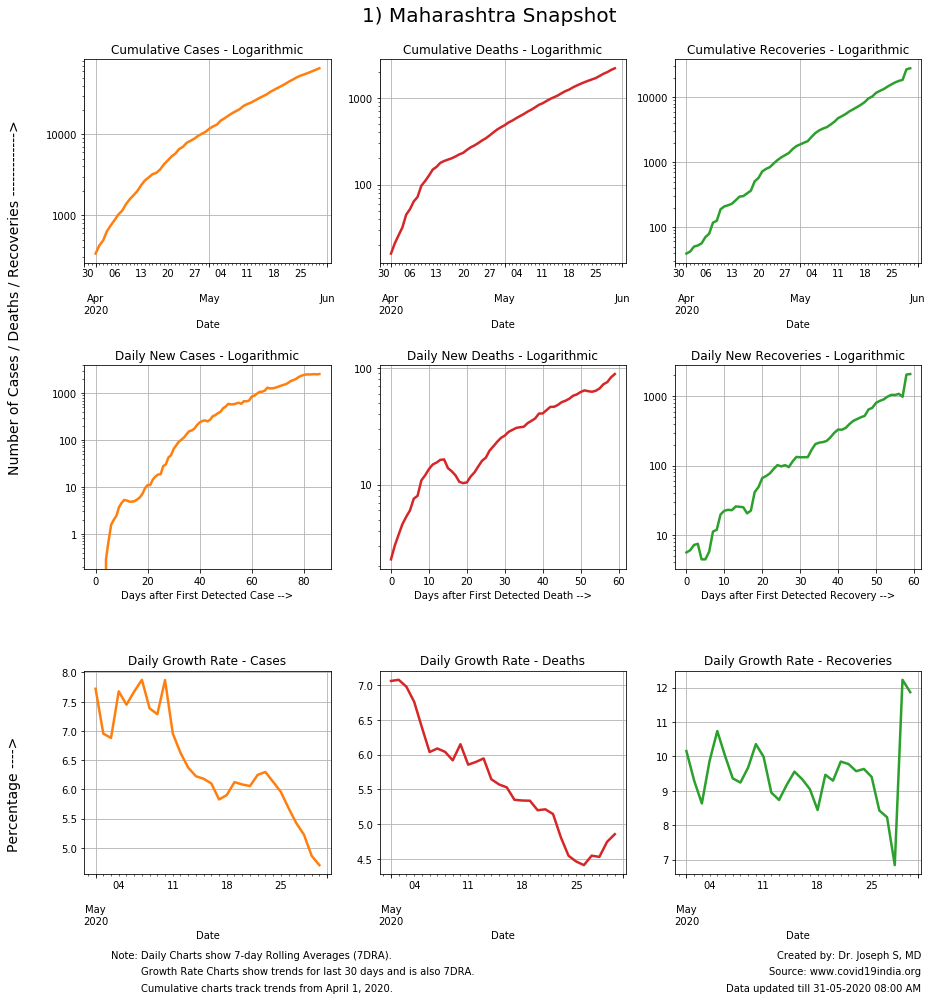

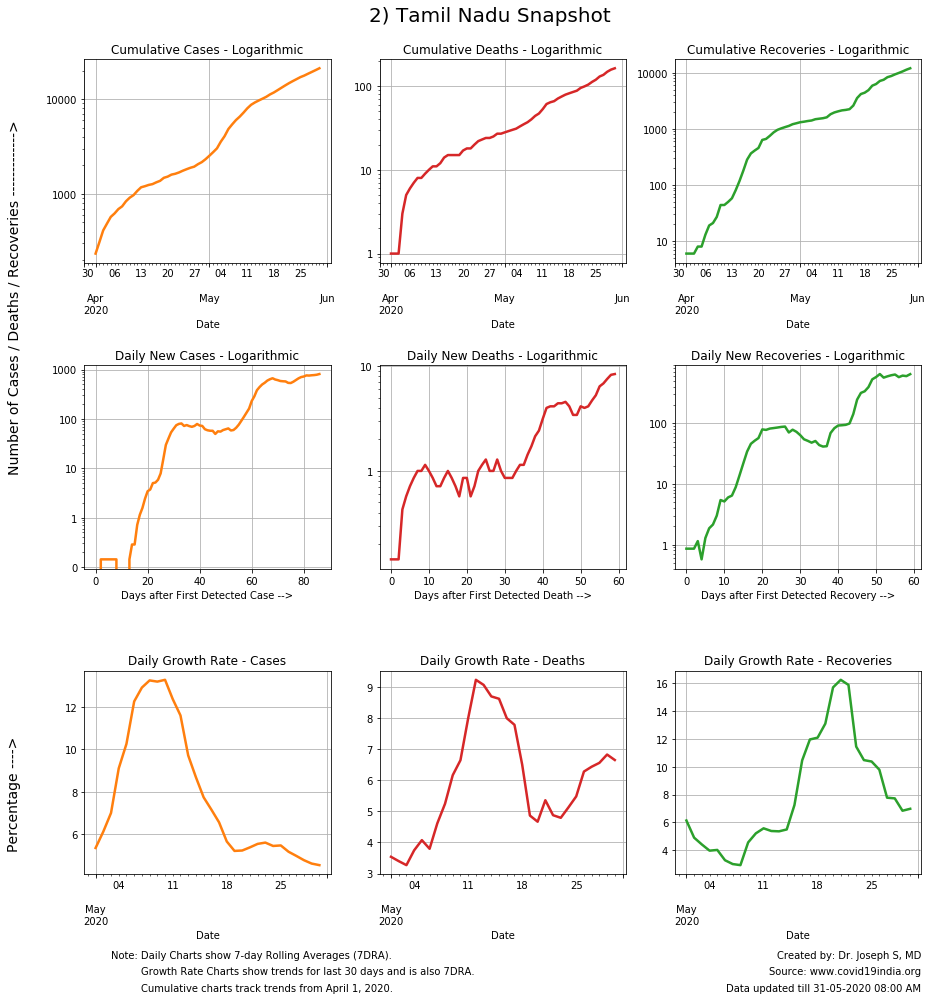

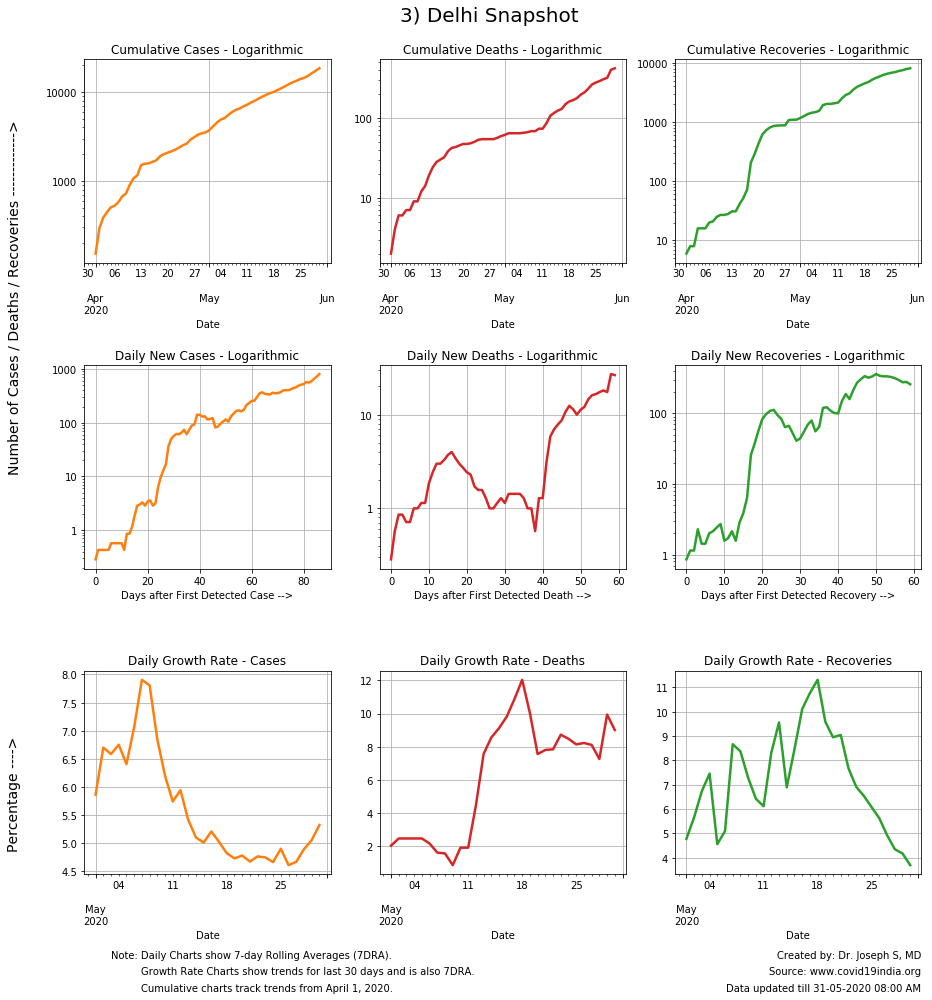

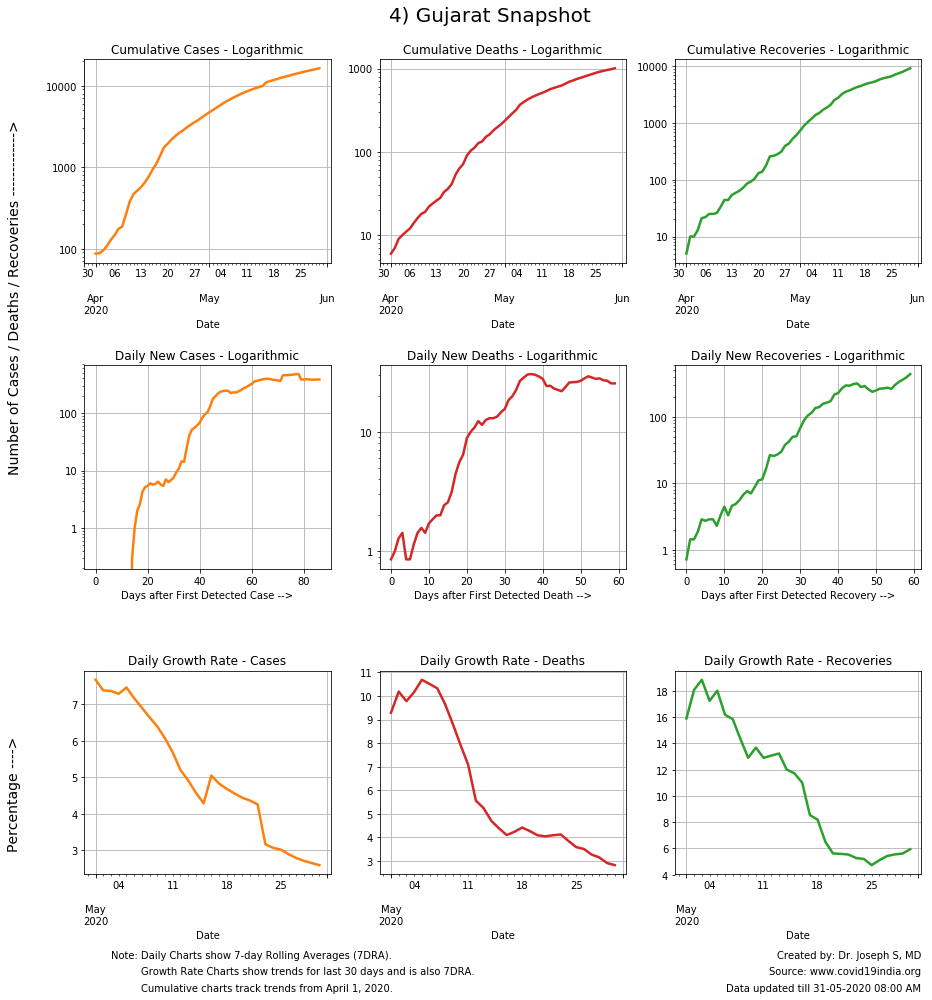

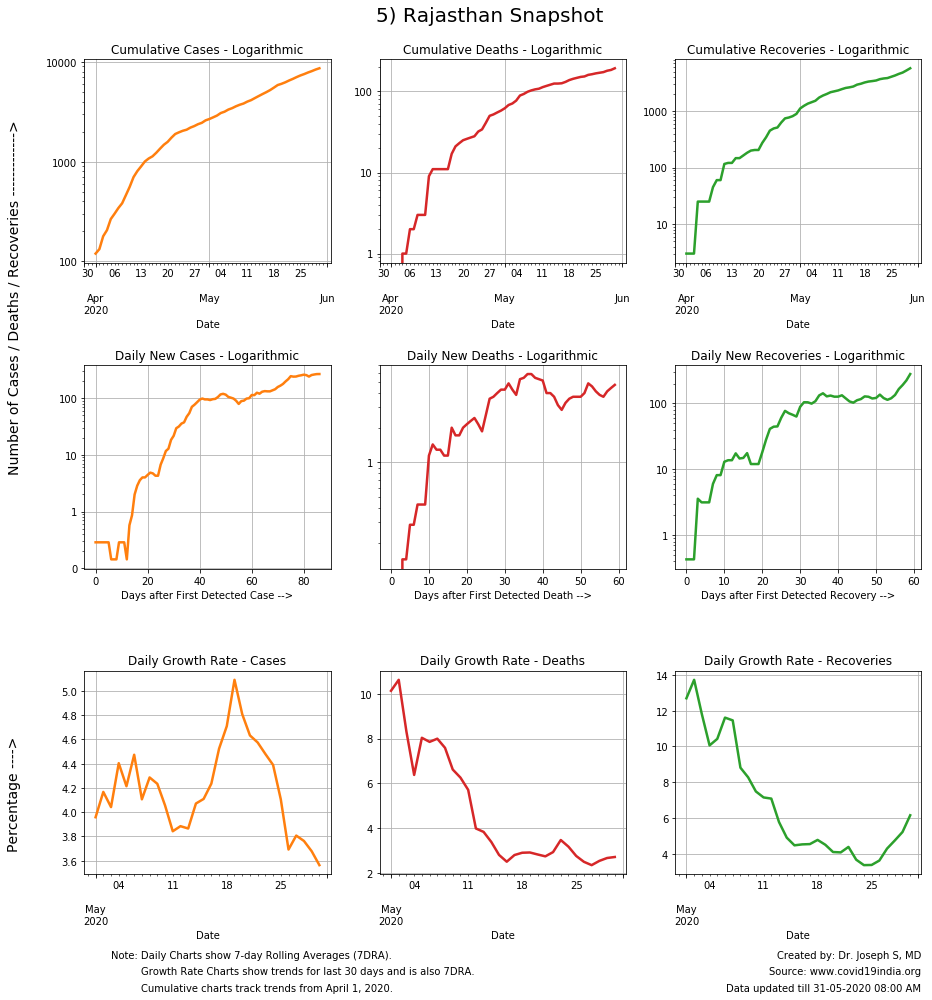

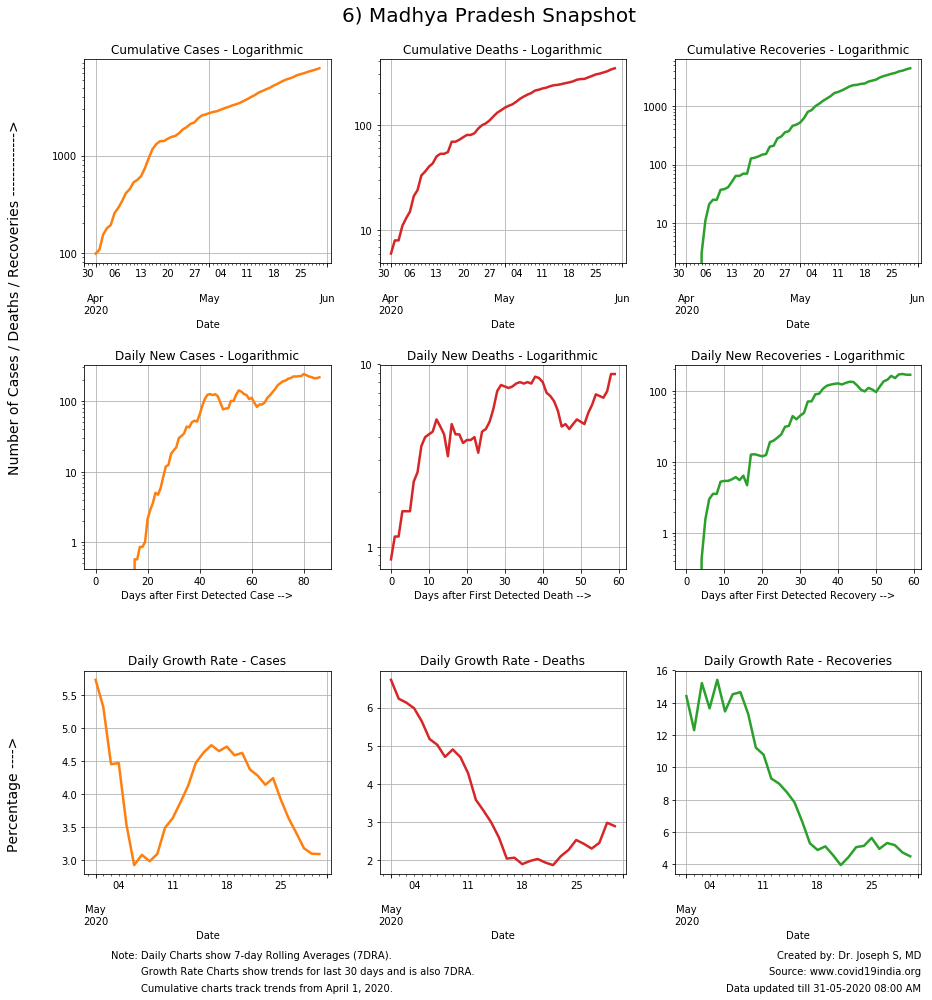

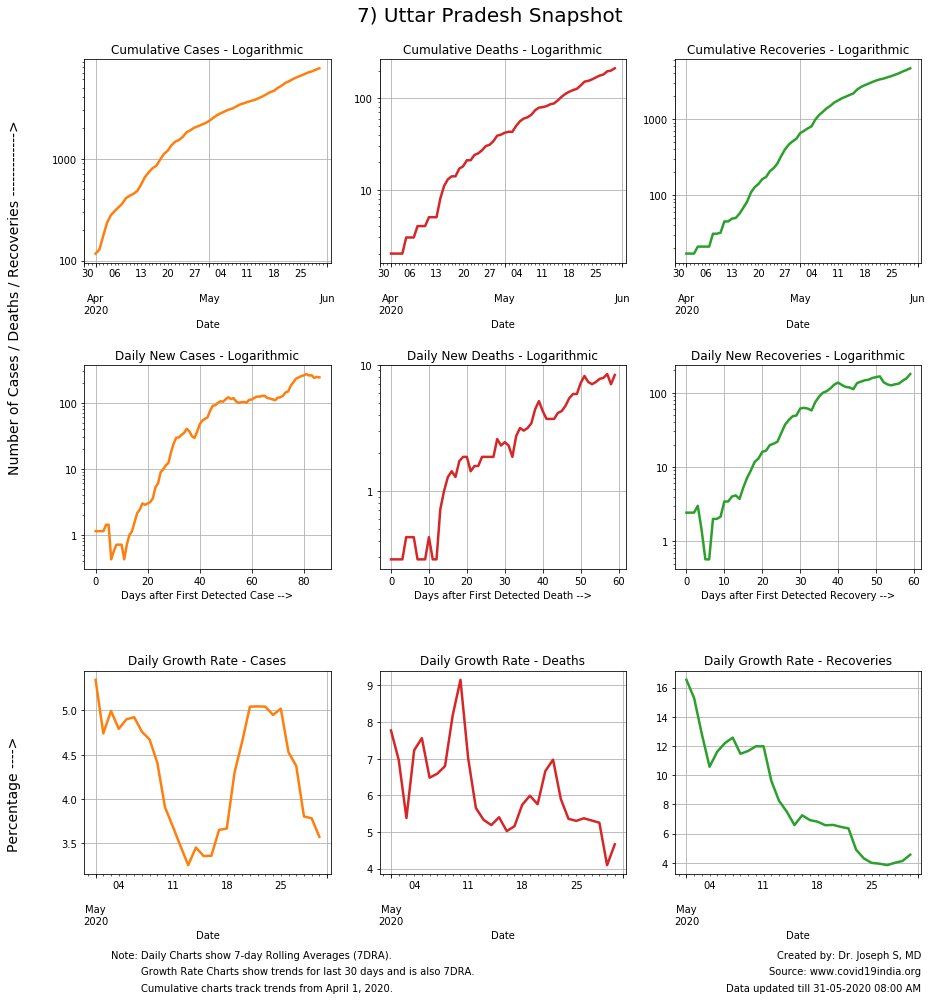

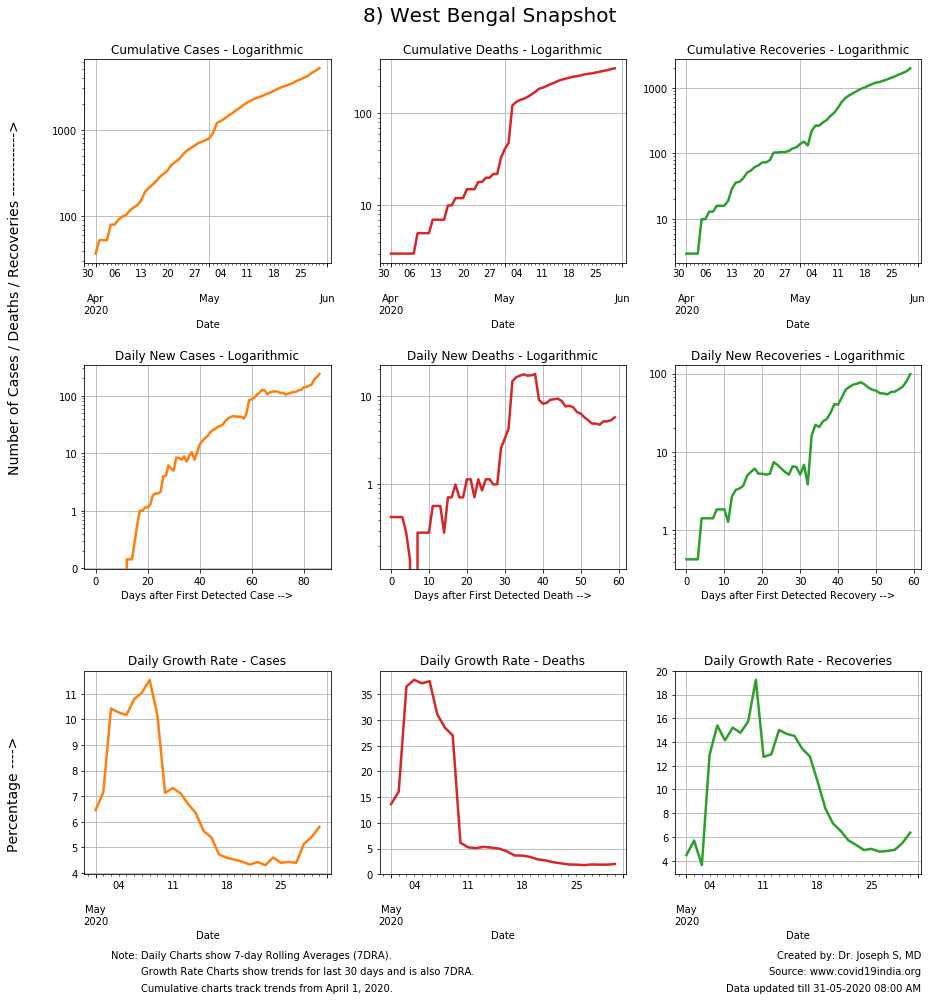

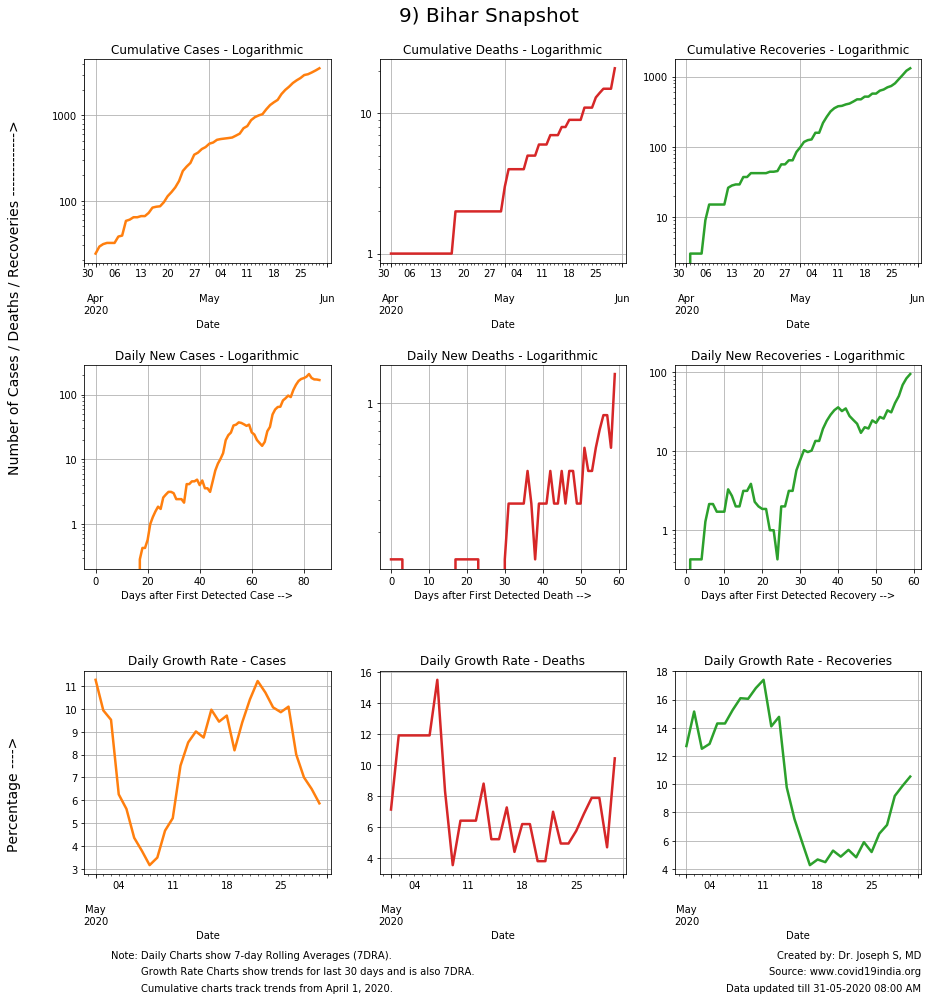

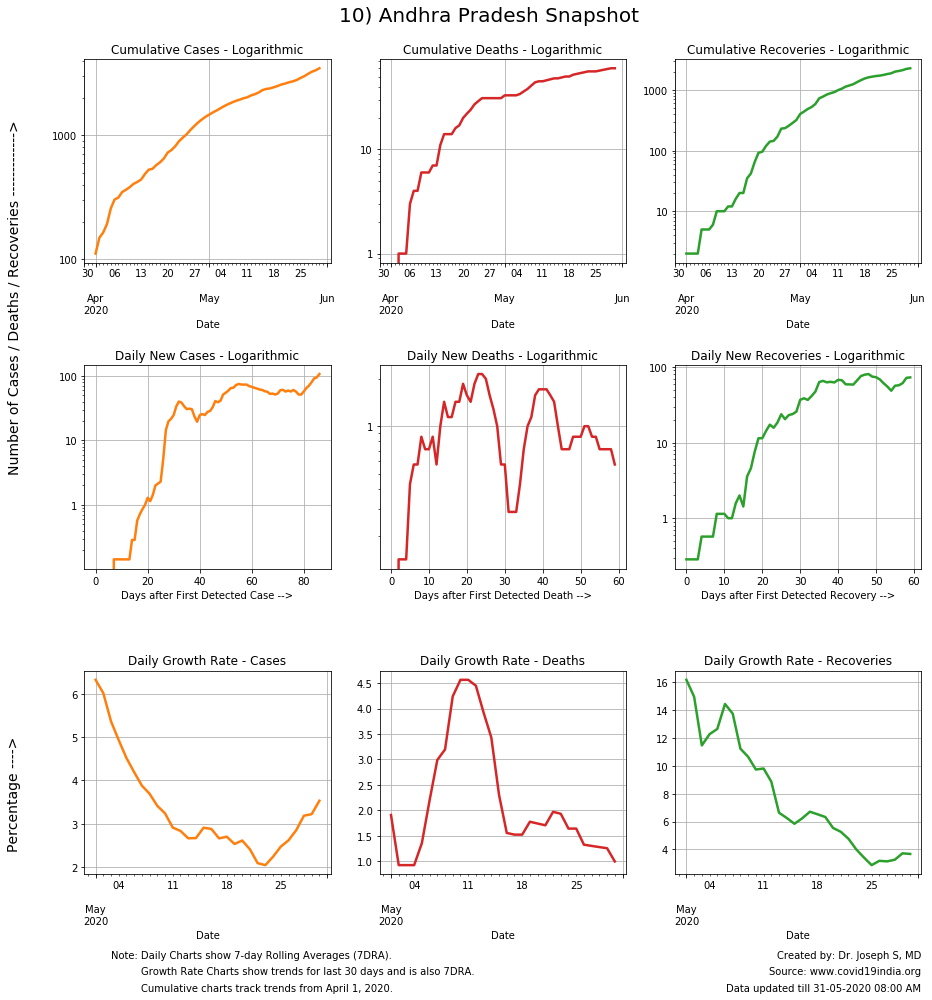

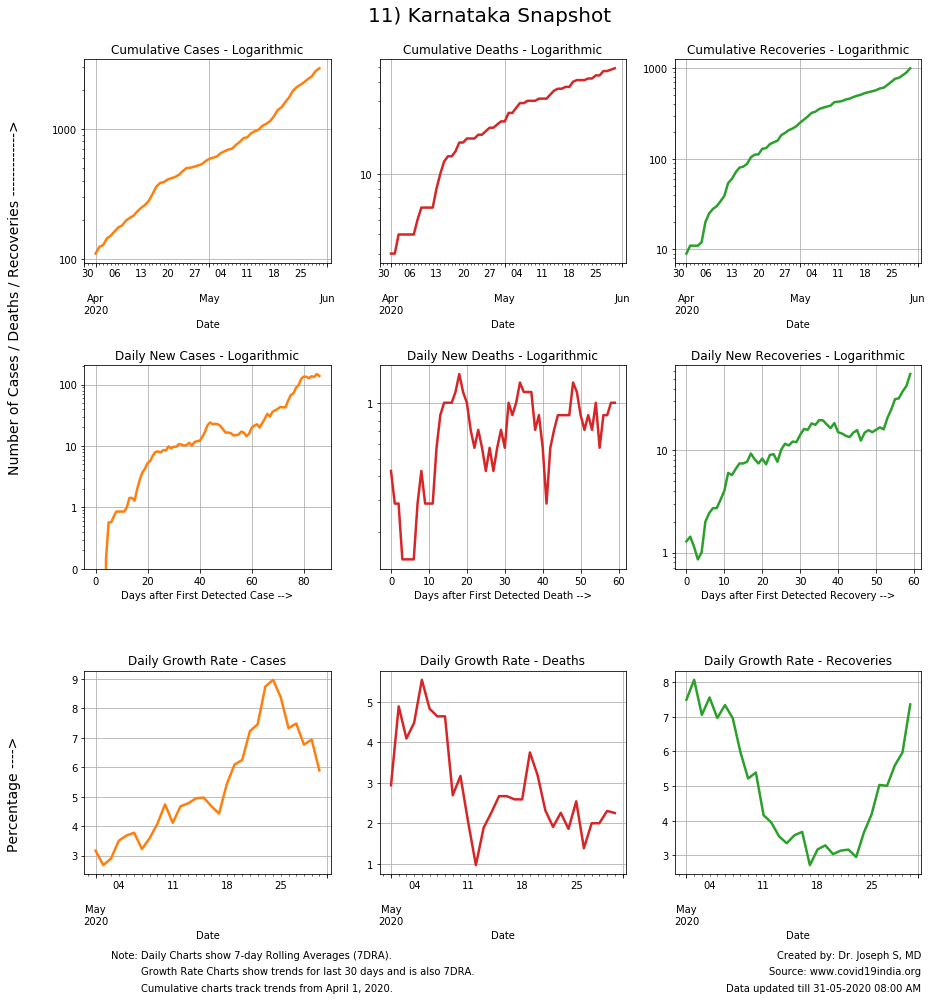

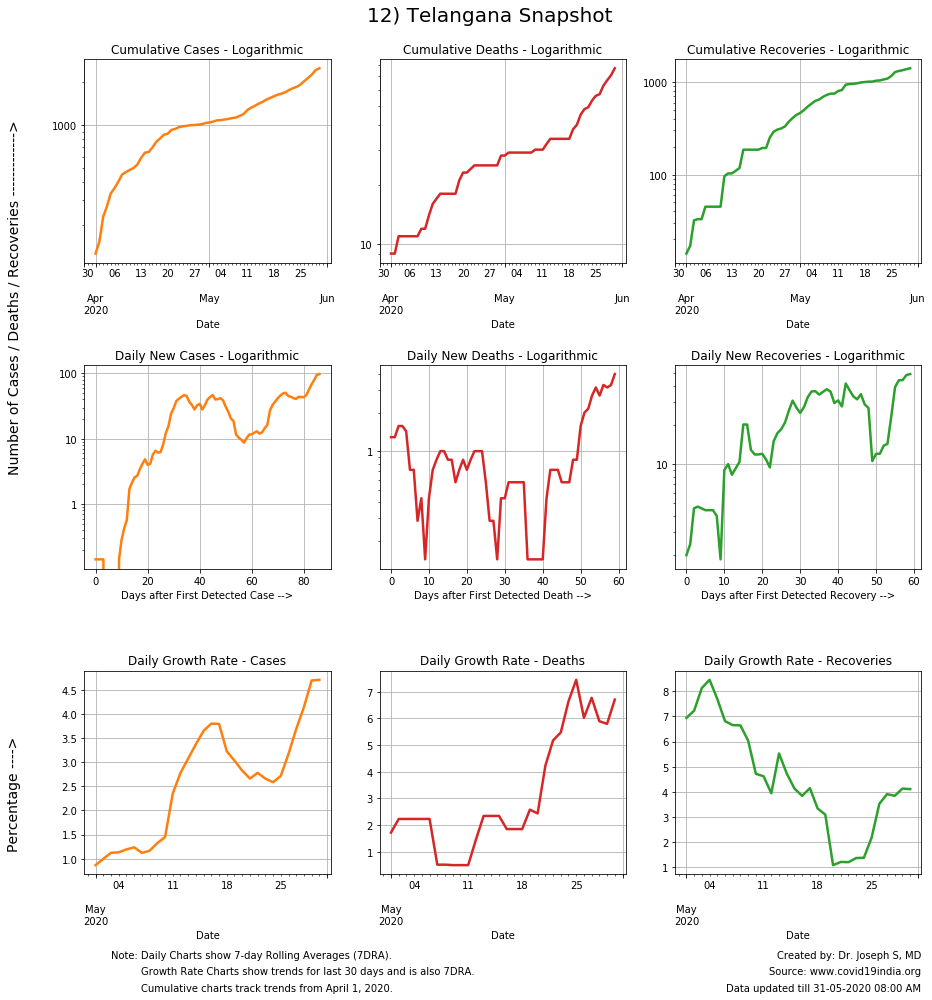

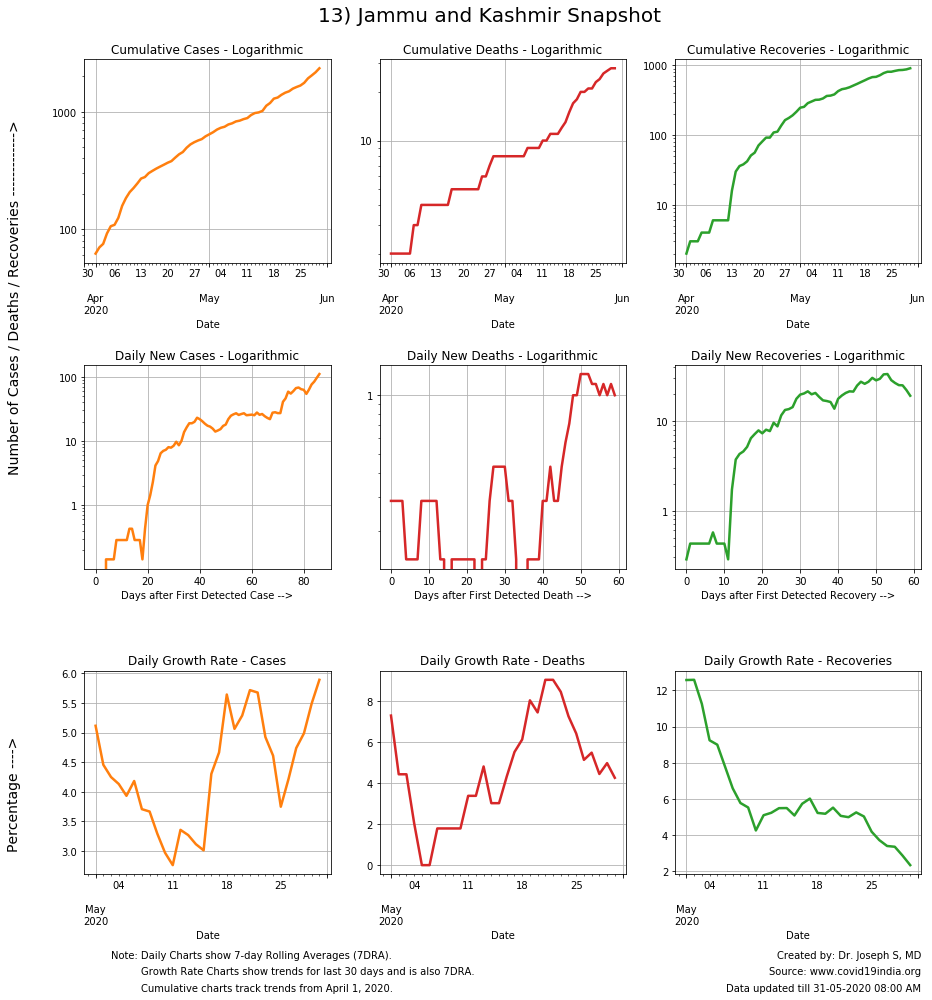

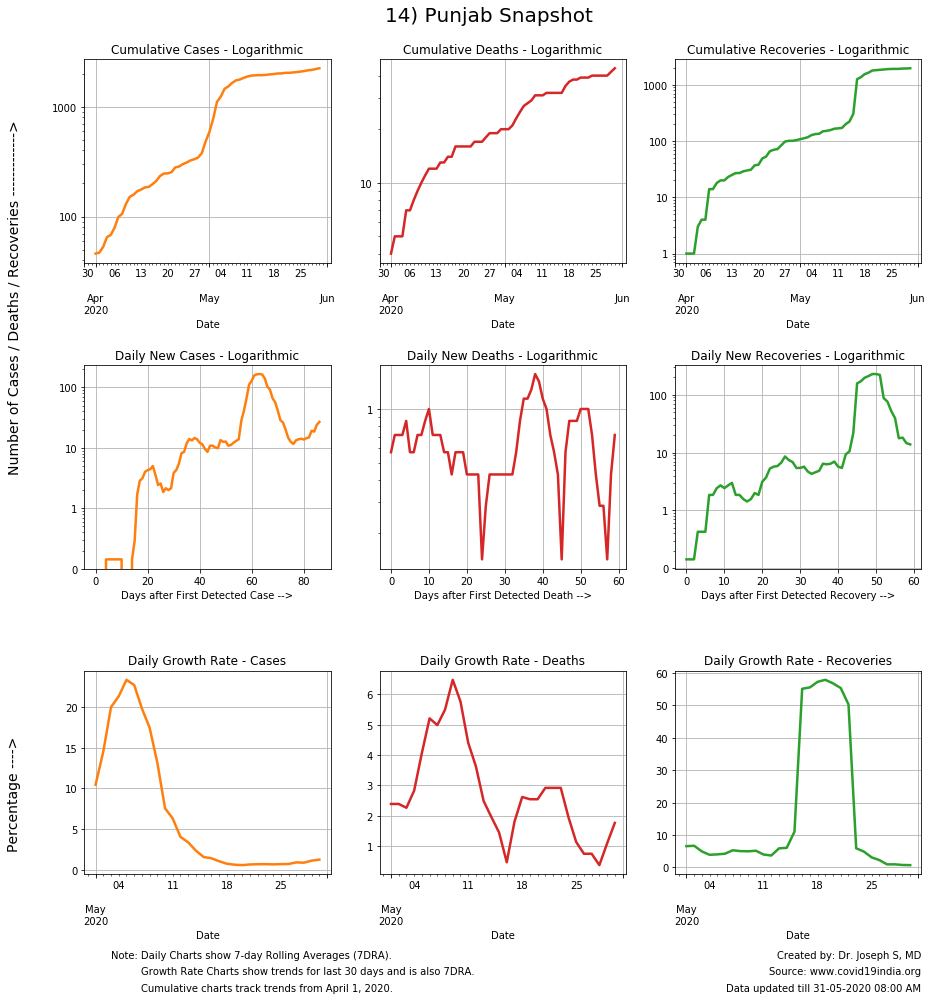

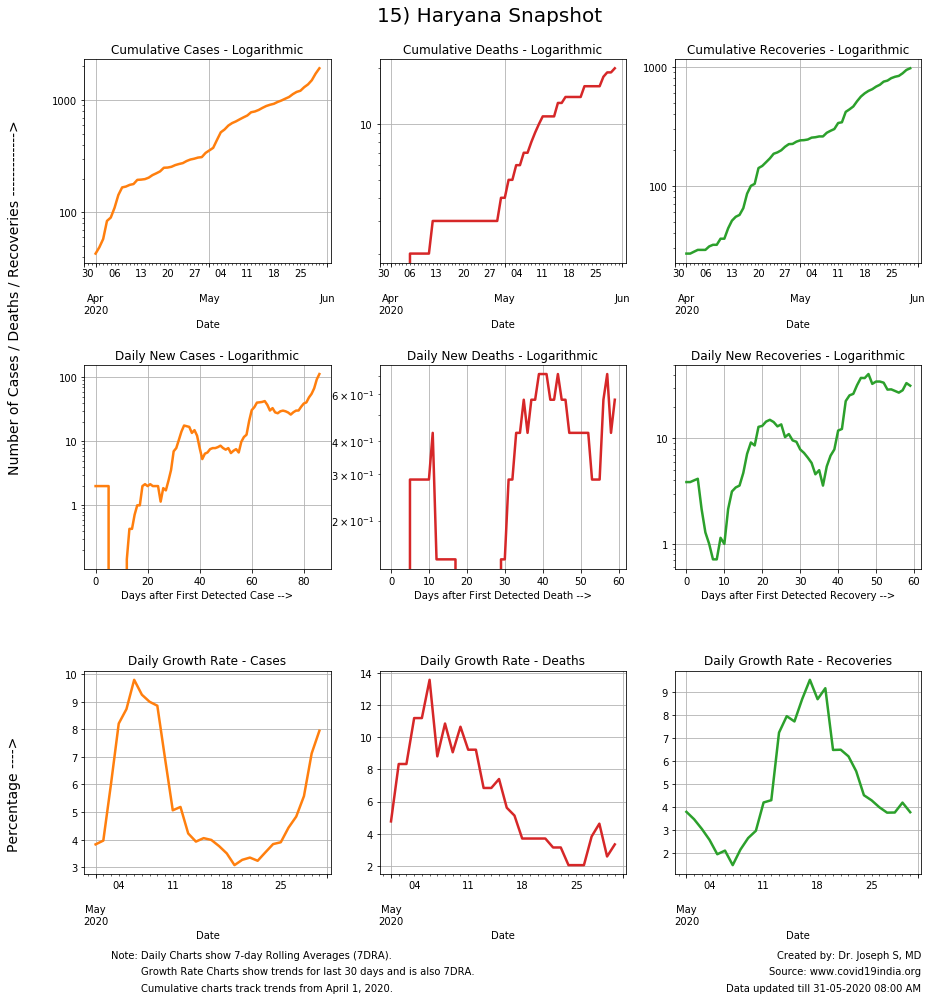

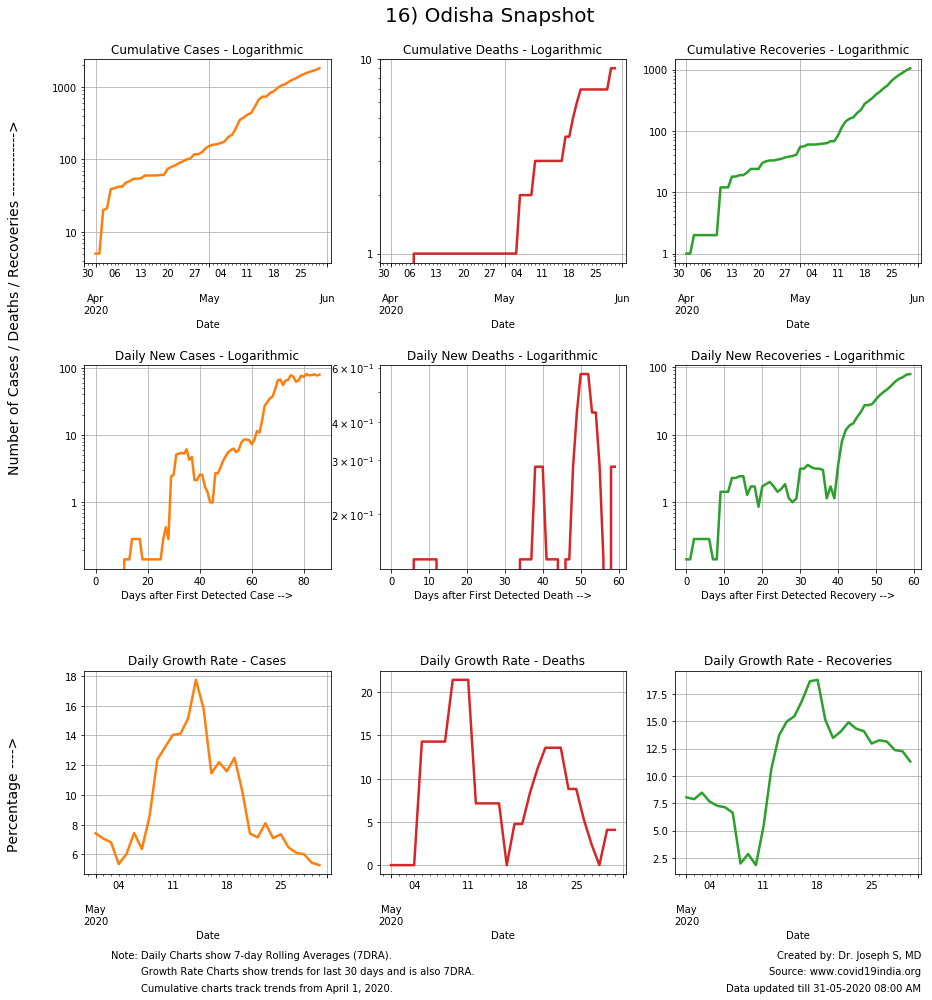

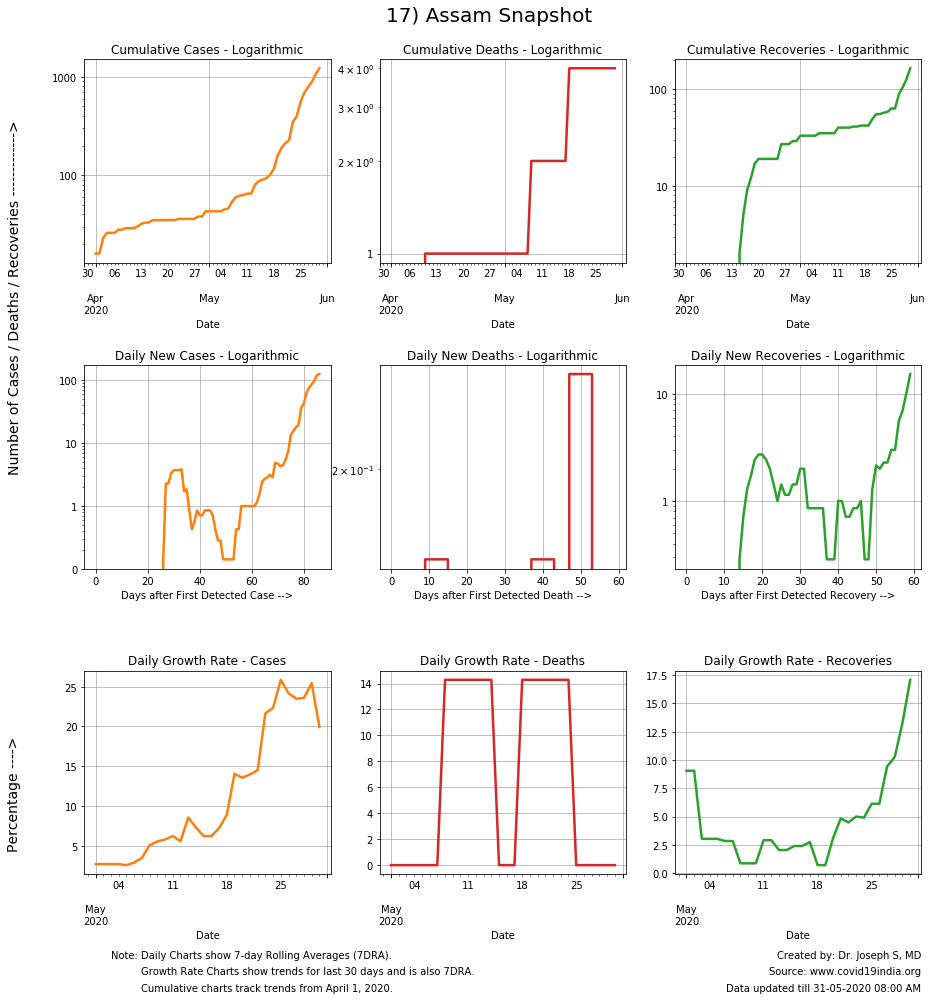

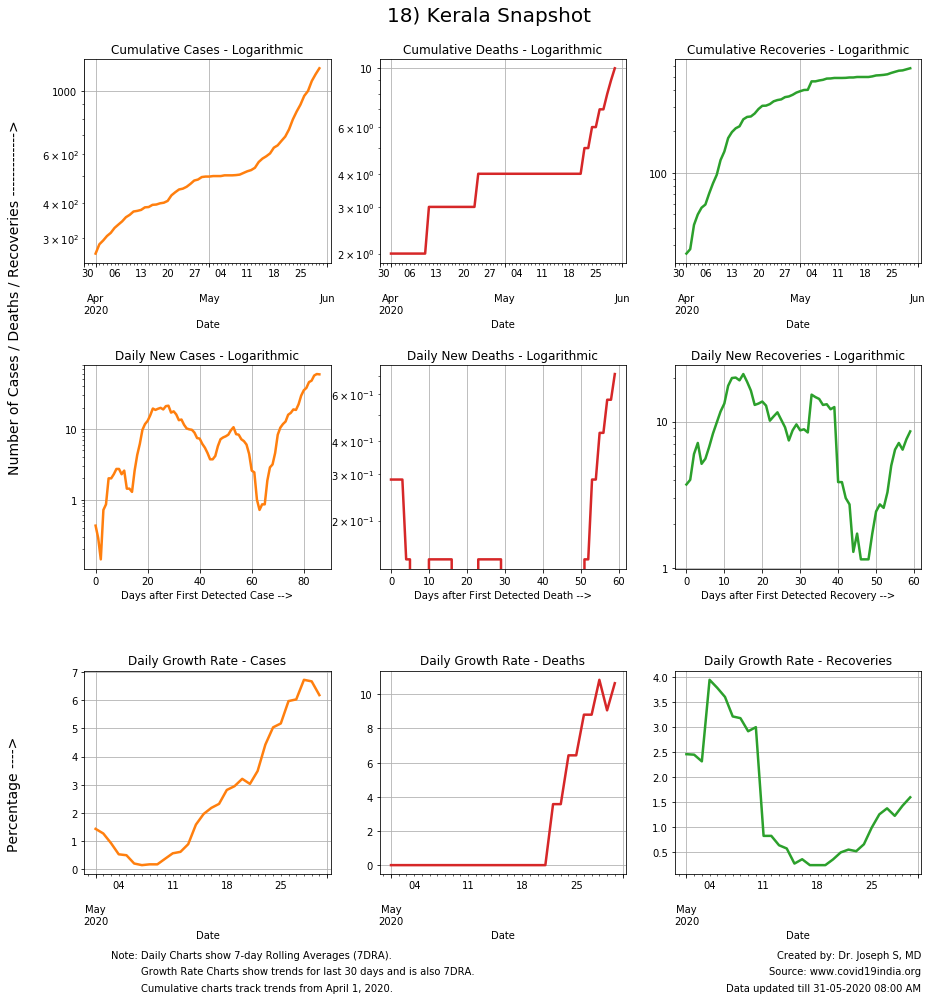

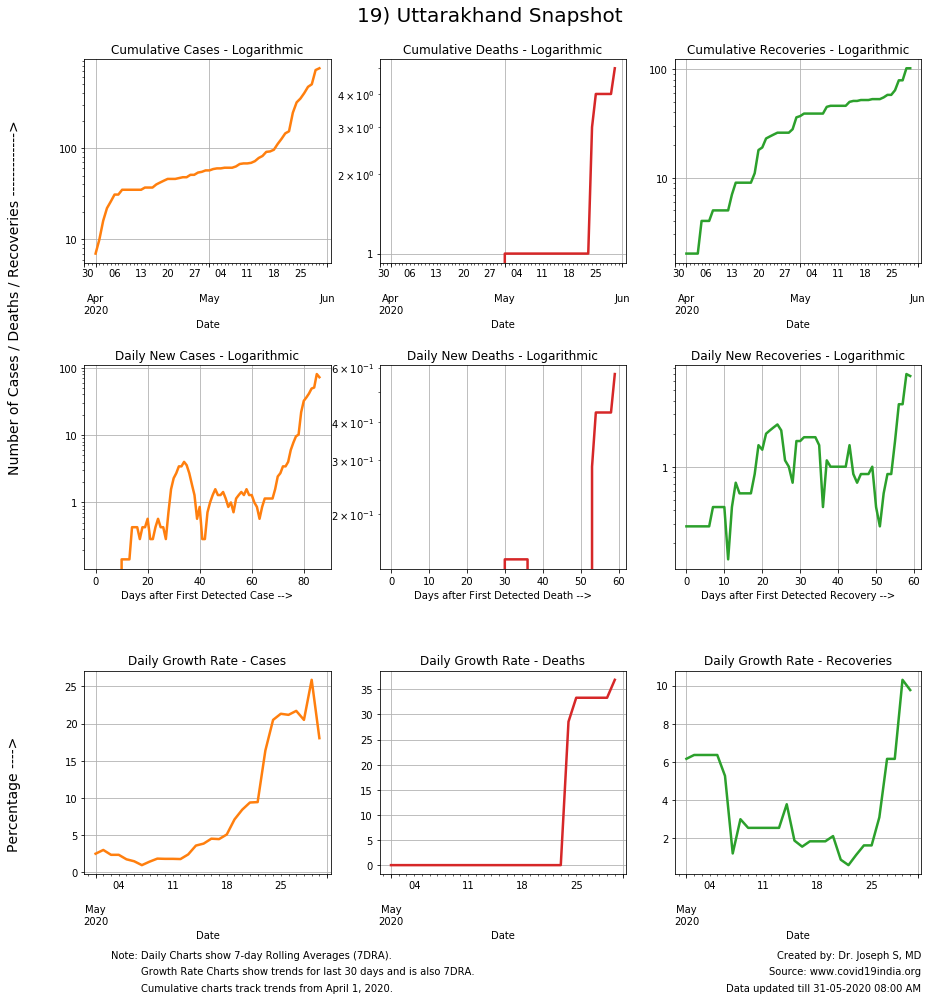

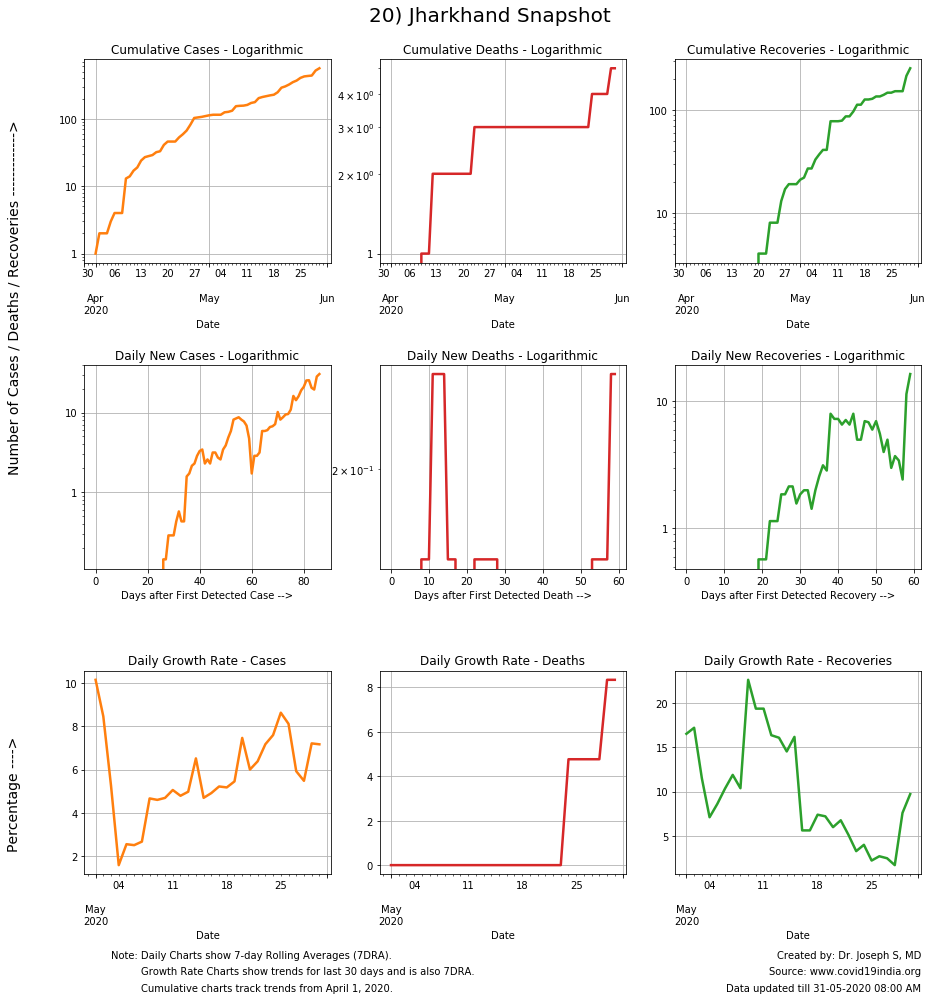

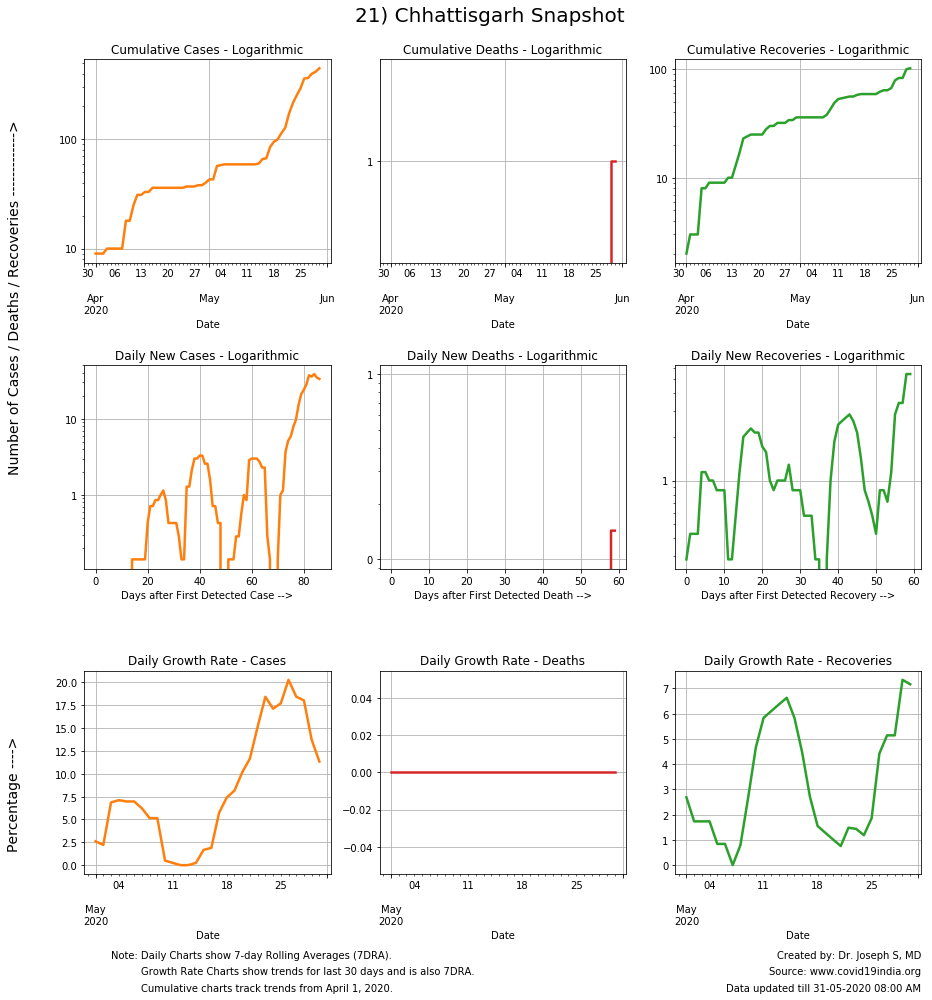

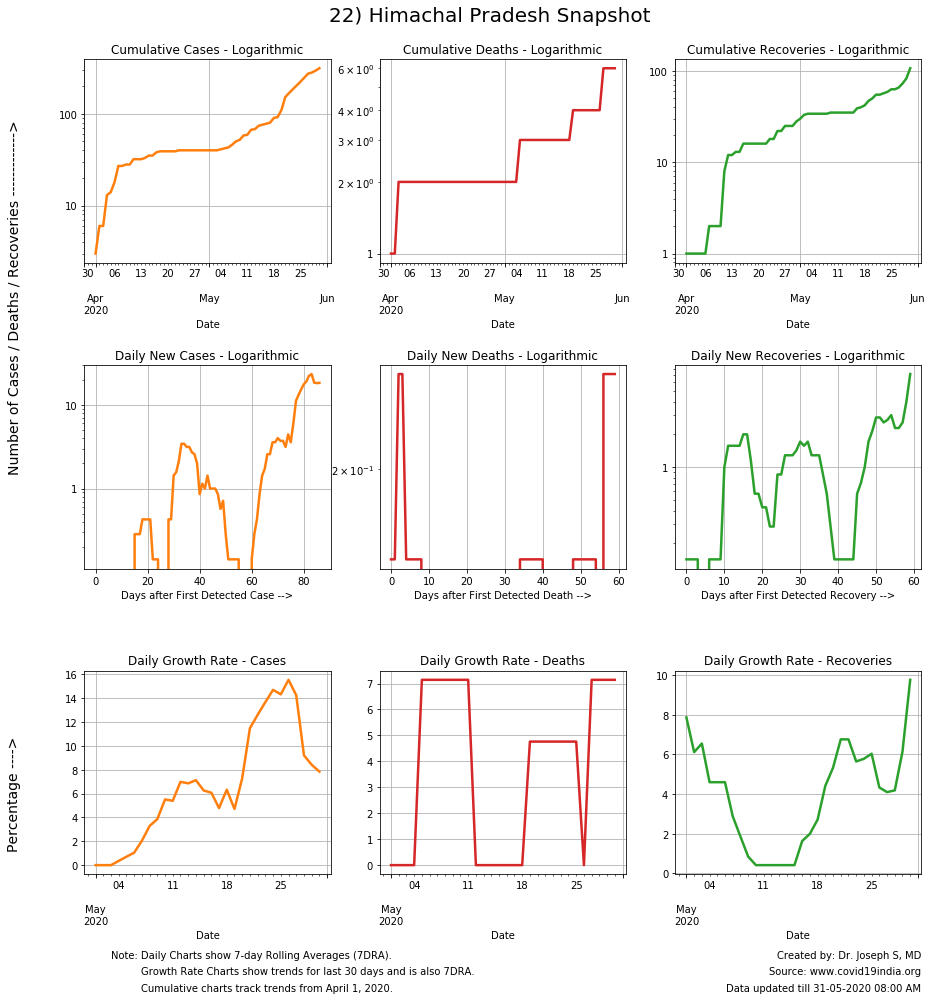

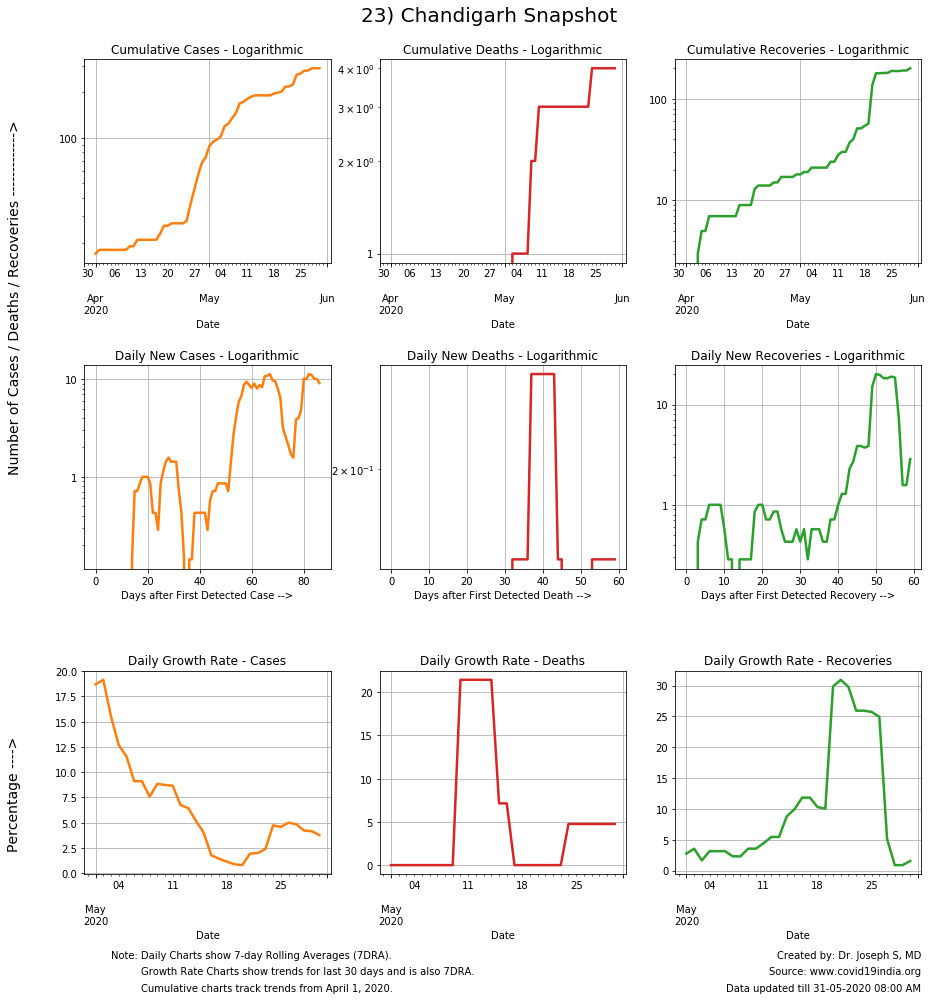

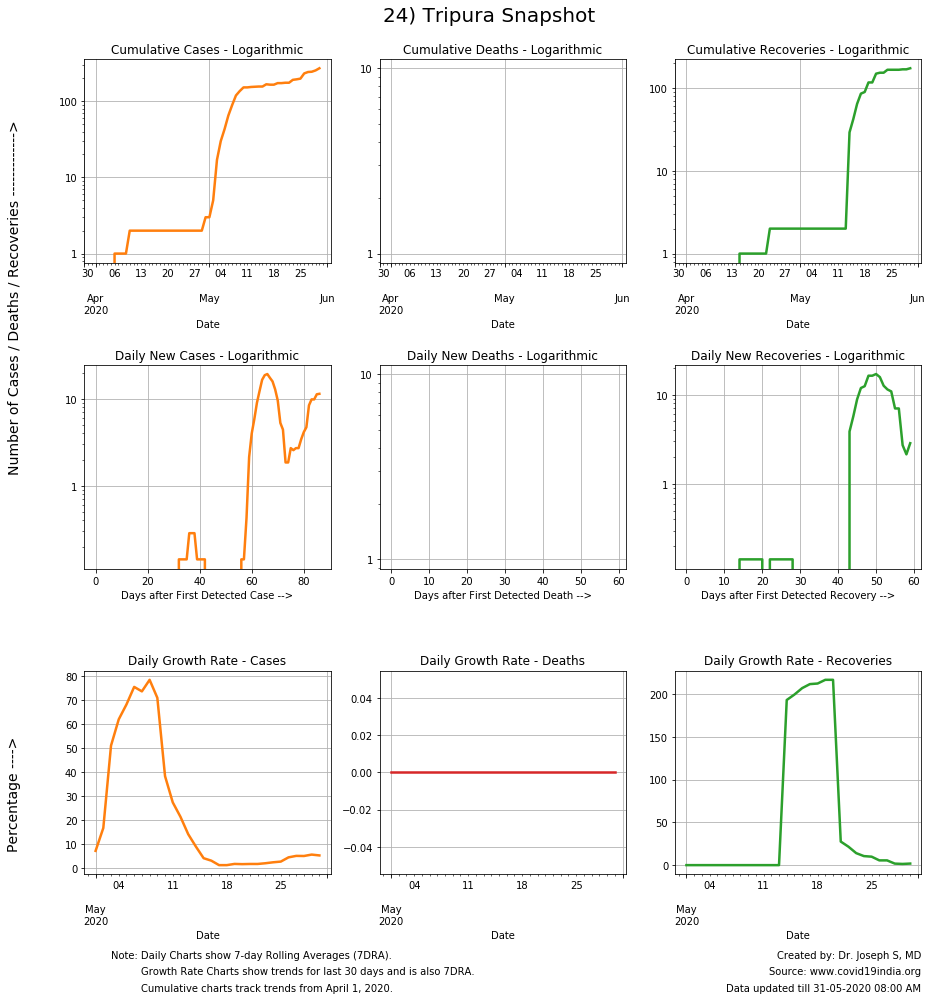

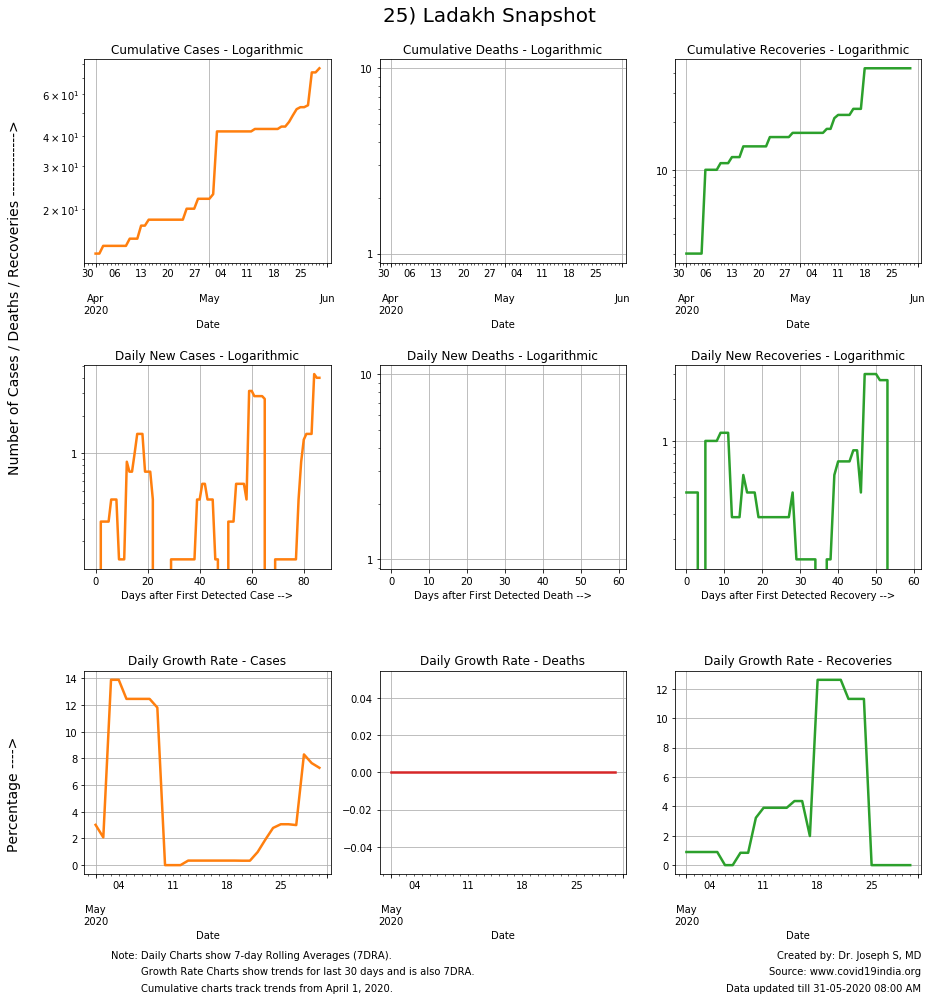

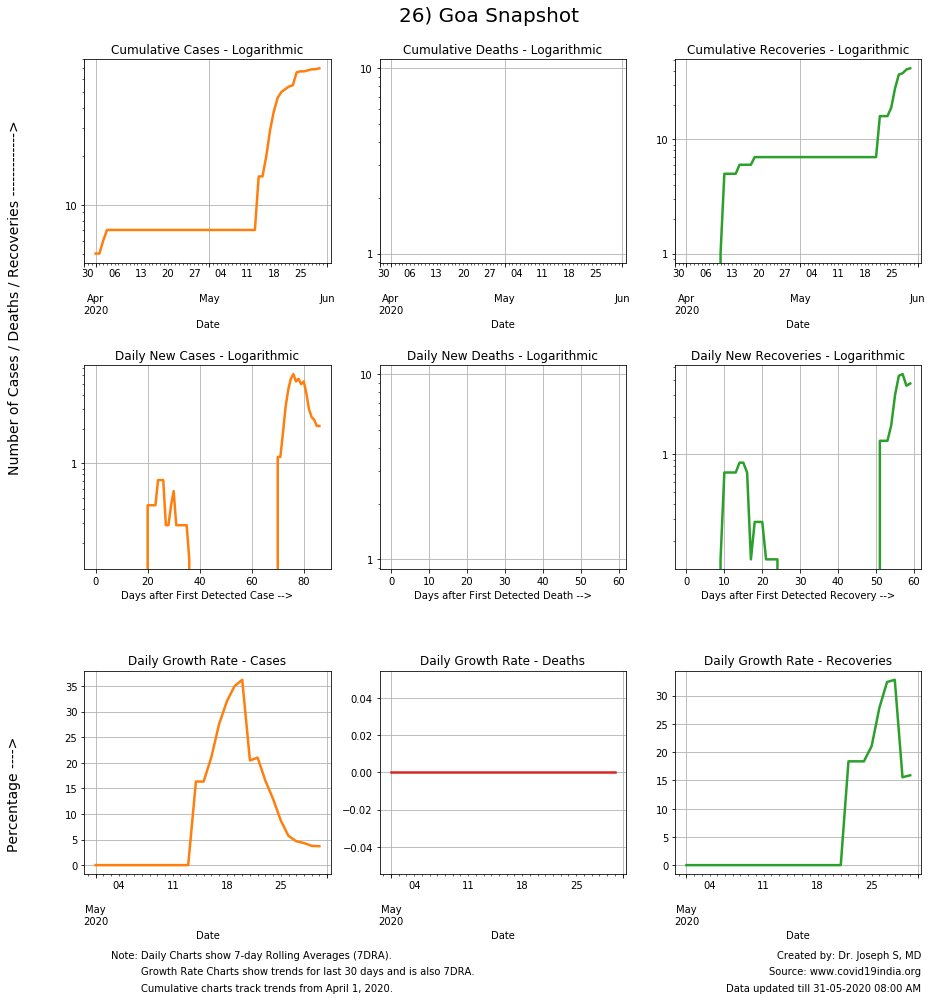

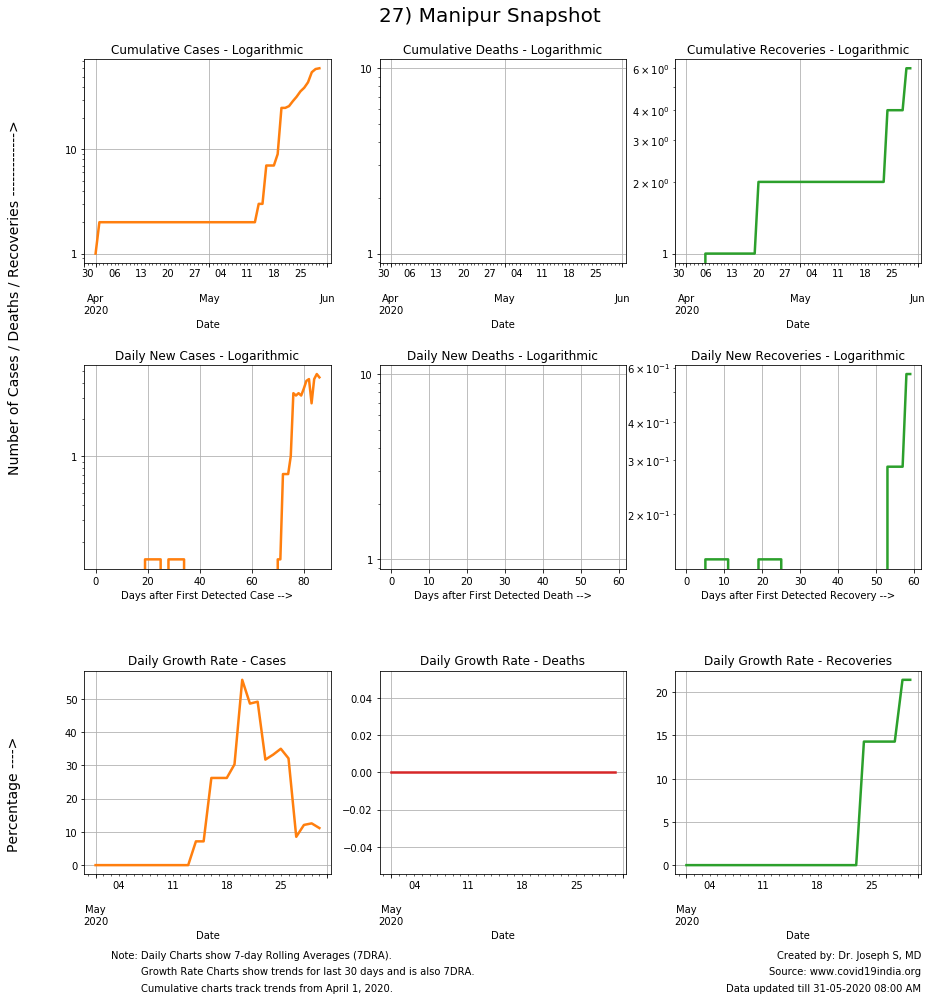

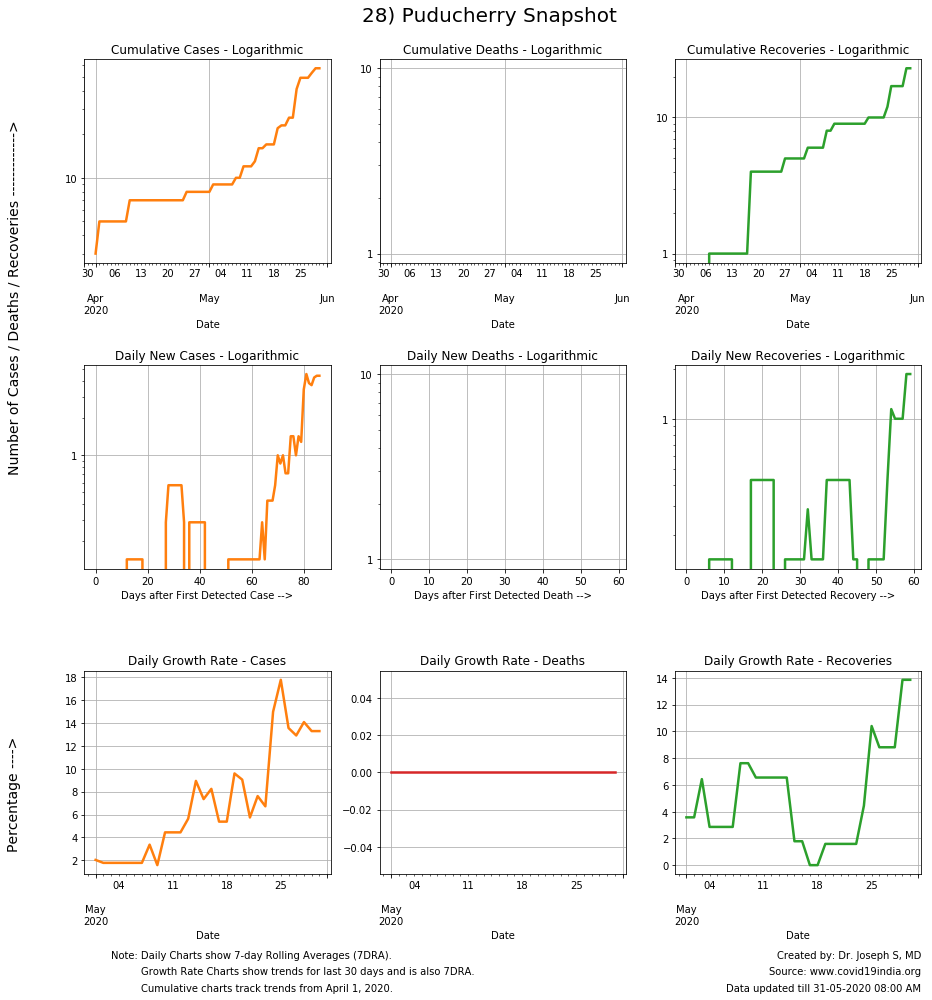

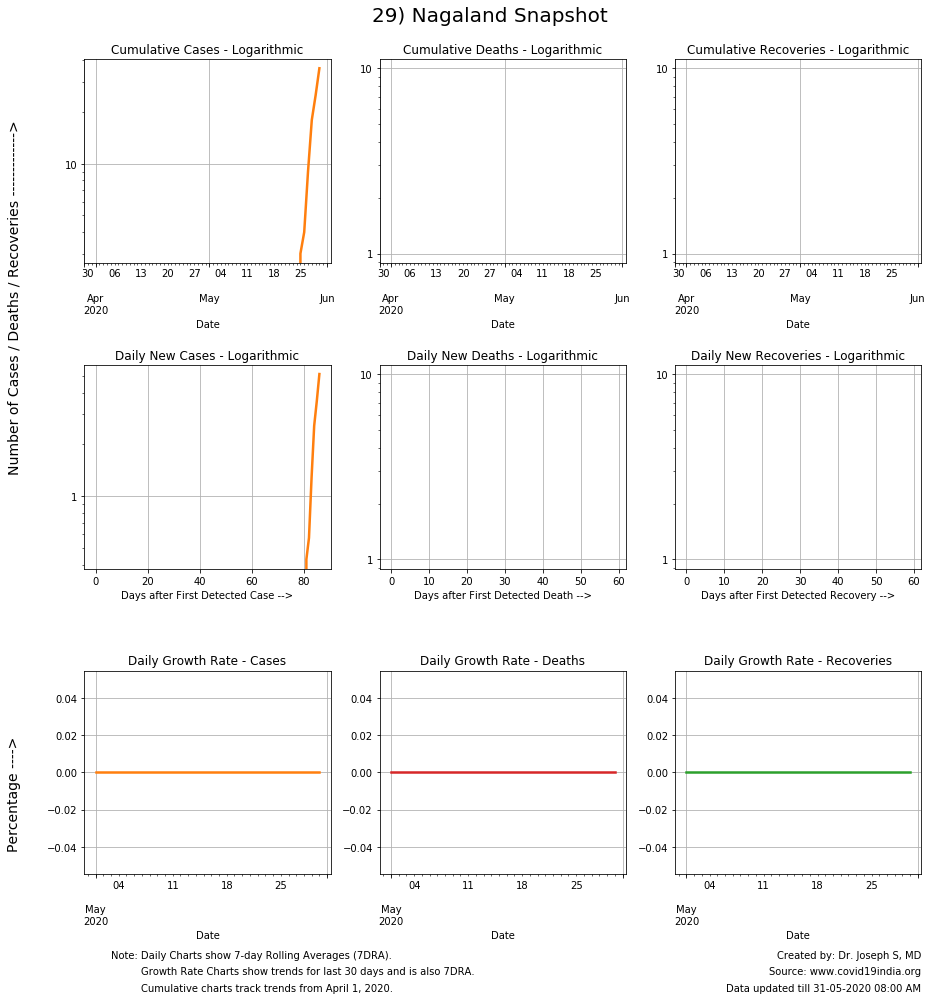

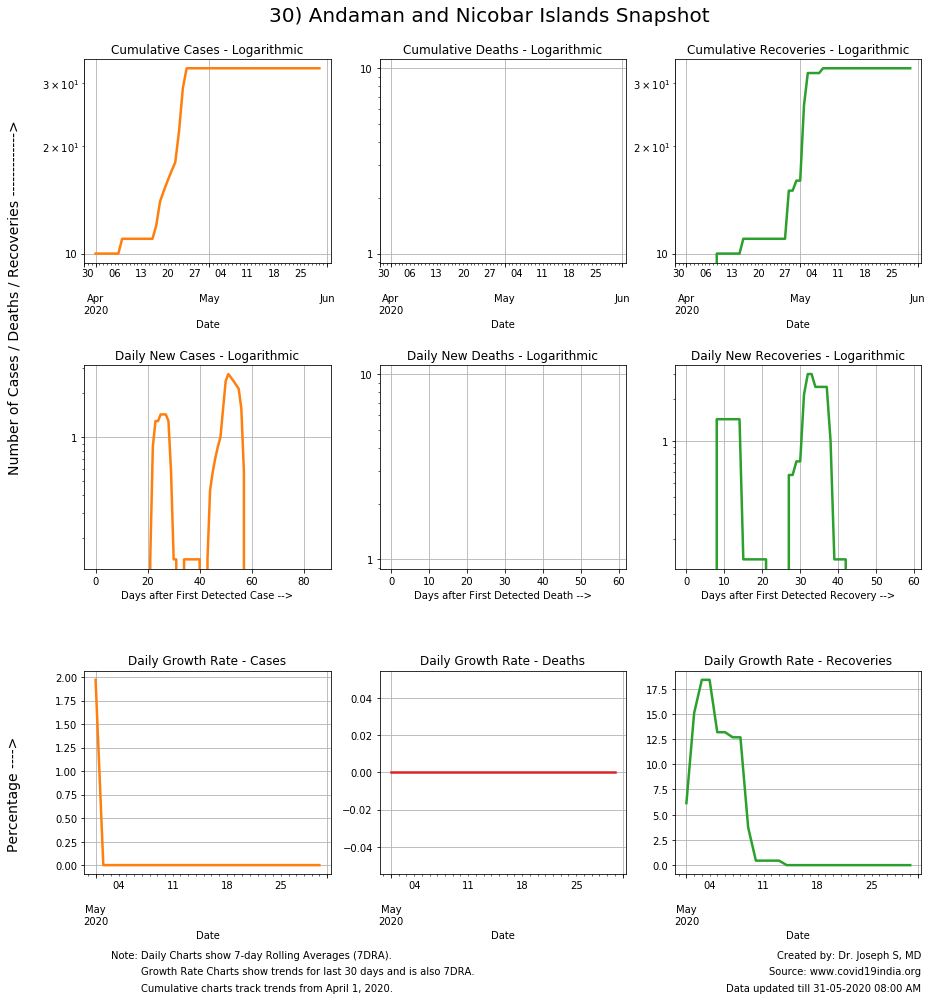

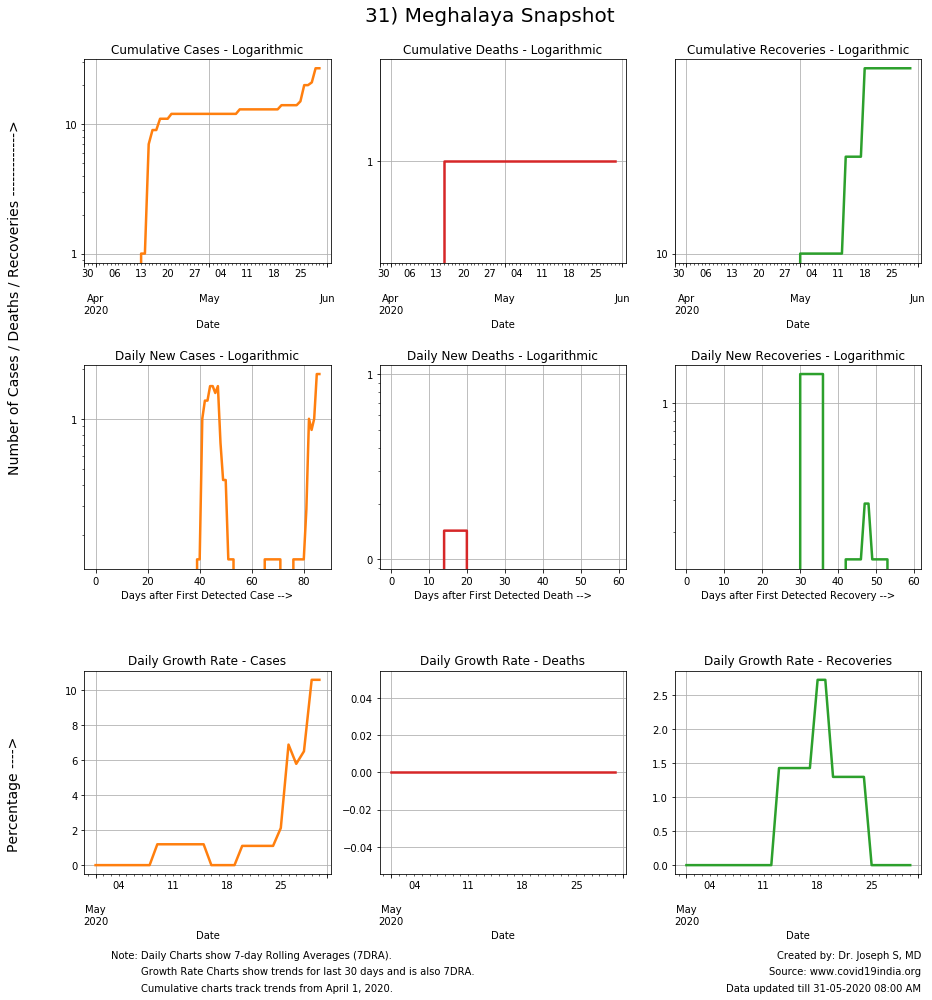

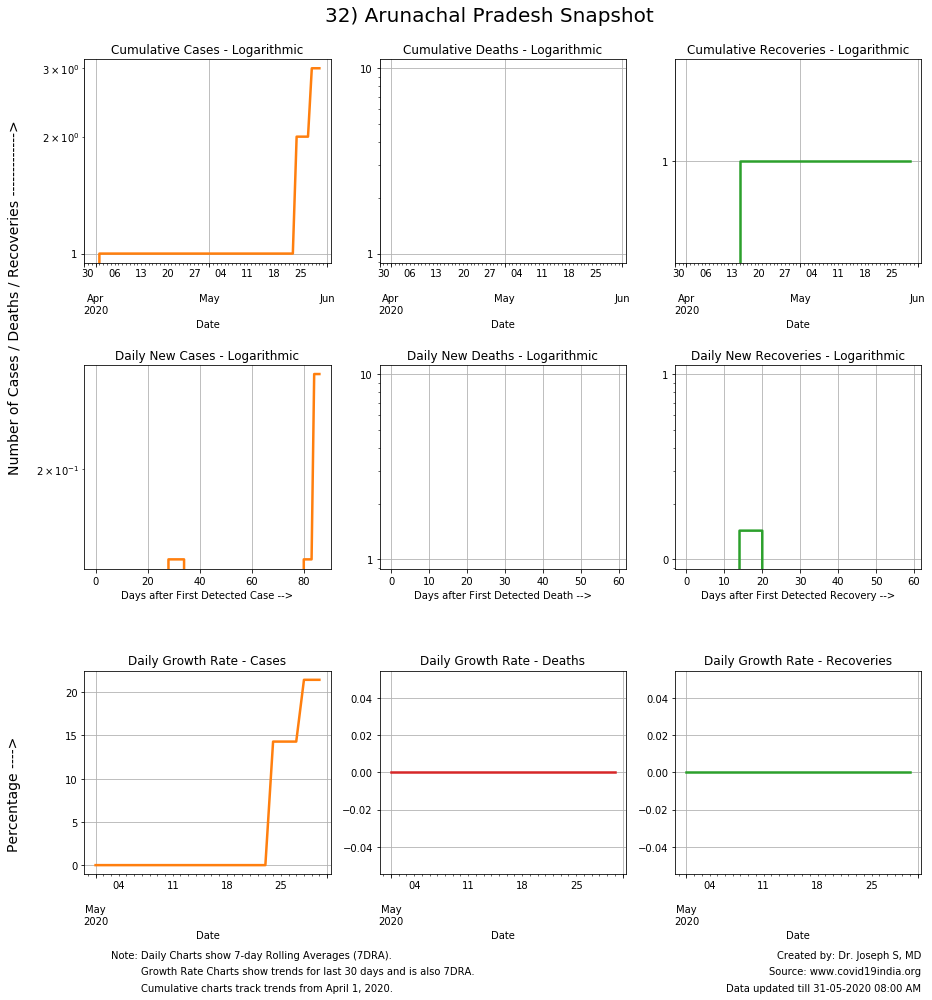

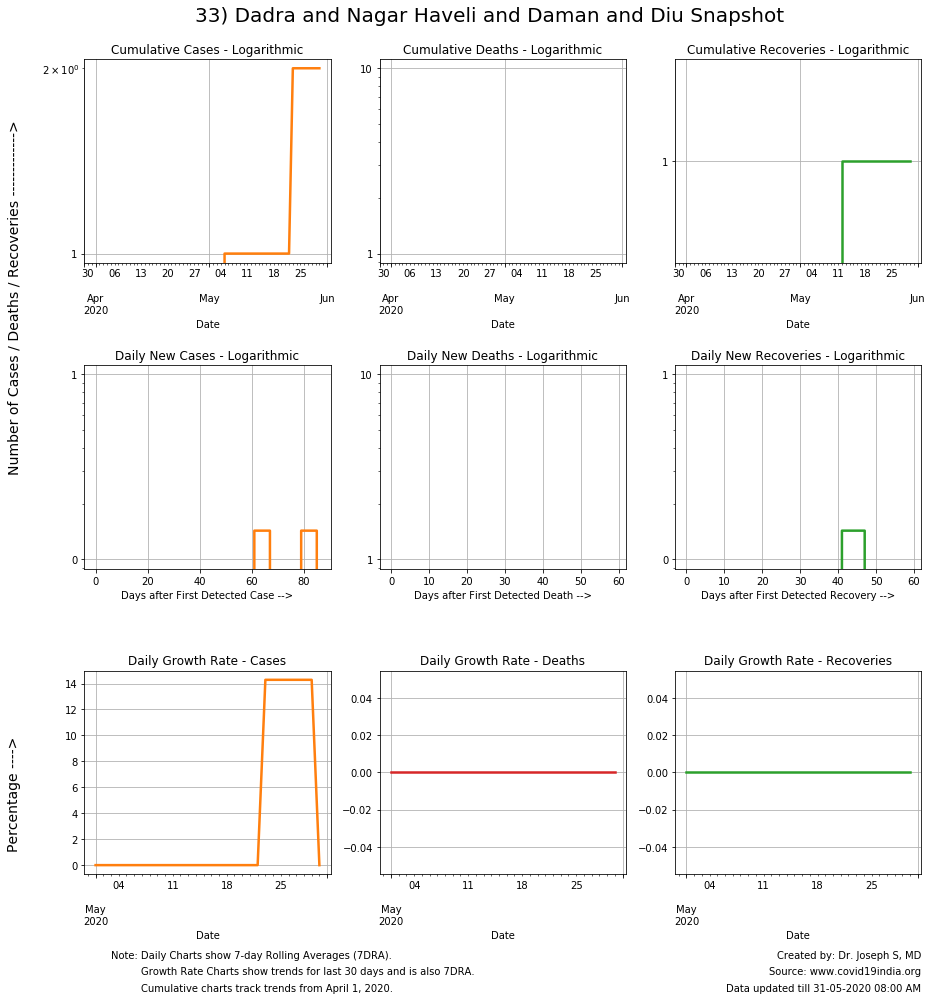

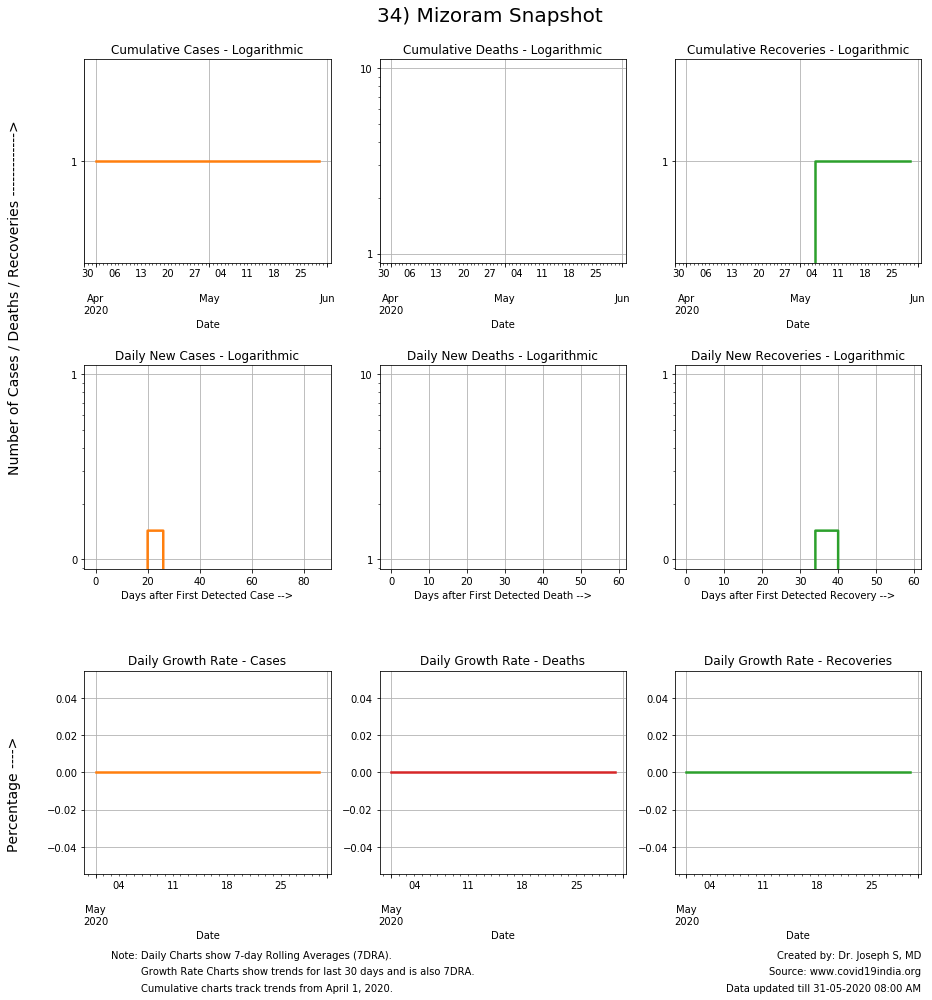

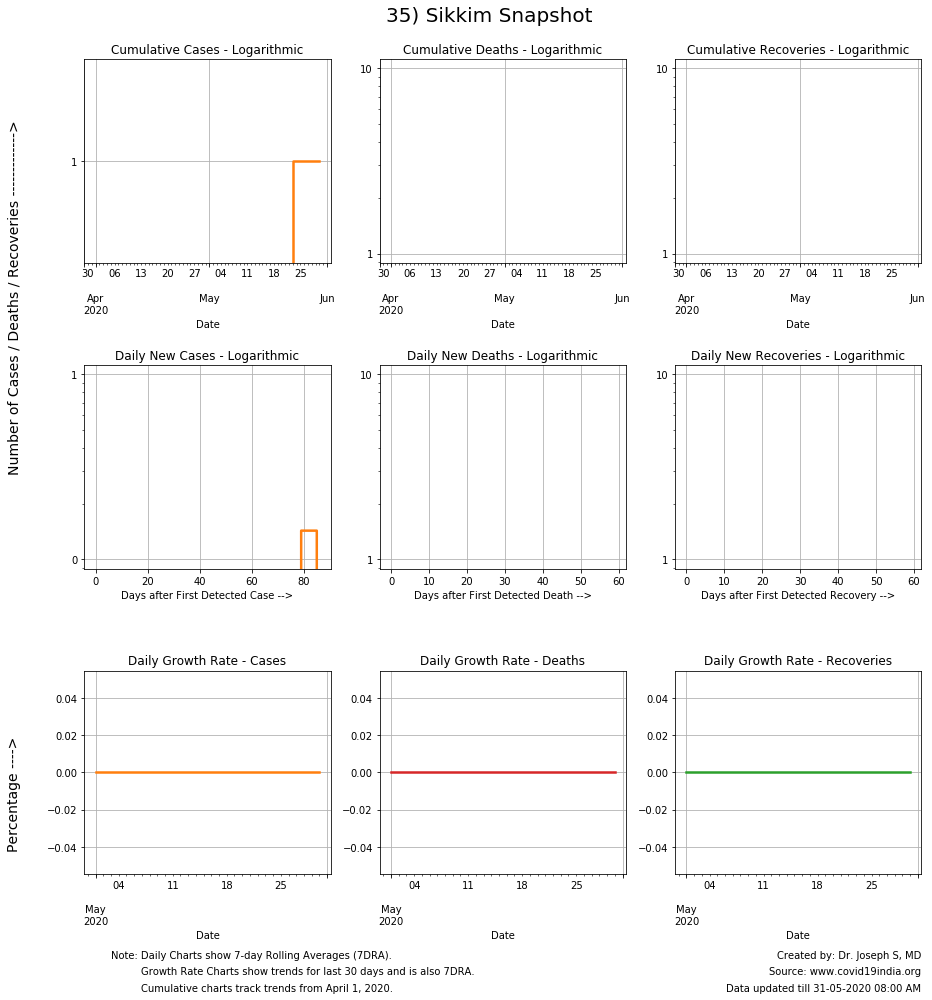

In [27]:
# Create Snapshots for Individual States
lenst=len(state_list)
for a in range(lenst):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
    plt.subplots_adjust(hspace=0.5)
    sname=state_list[a] # State Name
    gnum=a+1 #graph Number
    figtit=str(gnum)+") "+sname+" Snapshot"

    c_state_cum_all[sname].tail(y).plot(kind='line', ax=axes[0,0], color='C1', grid=True, legend=None, linewidth=lw, title=t1).set_yscale('log')
    d_state_cum_all[sname].tail(y).plot(kind='line', ax=axes[0,1], color='C3', grid=True, legend=None, linewidth=lw, title=t2).set_yscale('log')
    r_state_cum_all[sname].tail(y).plot(kind='line', ax=axes[0,2], color='C2', grid=True, legend=None, linewidth=lw, title=t3).set_yscale('log')
    c_state_new7dra_daf[sname].plot(kind='line', ax=axes[1,0], color='C1', grid=True, legend=None, linewidth=lw, title=t4).set_yscale('log')
    d_state_new7dra_daf[sname].plot(kind='line', ax=axes[1,1], color='C3', grid=True, legend=None, linewidth=lw, title=t5).set_yscale('log')
    r_state_new7dra_daf[sname].plot(kind='line', ax=axes[1,2], color='C2', grid=True, legend=None, linewidth=lw, title=t6).set_yscale('log')
    c_state_cum_pct[sname].tail(30).plot(kind='line', ax=axes[2,0], color='C1', grid=True, legend=None, linewidth=lw, title=t7).set_yscale('linear')
    d_state_cum_pct[sname].tail(30).plot(kind='line', ax=axes[2,1], color='C3', grid=True, legend=None, linewidth=lw, title=t8).set_yscale('linear')
    r_state_cum_pct[sname].tail(30).plot(kind='line', ax=axes[2,2], color='C2', grid=True, legend=None, linewidth=lw, title=t9).set_yscale('linear')
    axes[1,0].set_xlabel('Days after First Detected Case -->')
    axes[1,1].set_xlabel('Days after First Detected Death -->')
    axes[1,2].set_xlabel('Days after First Detected Recovery -->')
    
    for i in range(2):
        for j in range(3):
            axes[i,j].yaxis.set_major_formatter(formatter)

    footer1()
    figtit2=str(gnum)+" "+sname+" Snapshot"
    figtit3=figtit2+".jpg"
    figpath=ep_state/figtit3
    plt.savefig(figpath, dpi=300, bbox_inches='tight')
    #fig.show()